In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import math
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d
from skimage import data
from skimage.filters import threshold_otsu

# Example 3D scan

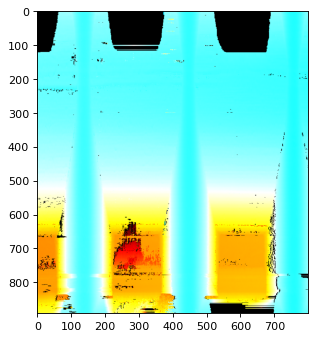

In [2]:
im = cv.imread(r'D:\Konrad\TCM_3D\20211102_114055_msa_type1_keyence_png\3D_S003_R002_211102_114346.png')
figure(figsize=(5, 5), dpi=80)
plt.imshow(im)

# Teeth 3D MSA analyze

In [3]:
def fz1(A,B,show = False):
    sx,sy = r.shape
    sum1 = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)
    sumg = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)
    sumd = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)

    # Deletinf 0 - values (scanning holes)
    for x in range(600,sx):
        for y in range(500,750):

            if(r[x,y] == 255 or (b[x,y]) == 0 and g[x,y] == 0):
                sum1[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])  
            else:
                sum1[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]
                
            if(sum1[x,y] < A or sum1[x,y] > B): sum1[x,y] = 0

    # Finding treshold
    his = sum1[sum1 > 0]
    hist, bins = np.histogram(his, bins = B - A)
    freq = 300
    hist[np.where(hist <= freq)] = 0
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    hist0 = hist[hist > 0]
    srodek = int(len(hist0)/2)
    poczatek = np.where(hist == hist0[0])
    thresh = center[int(poczatek[0][0] + srodek)]
   
    # Applying treshold
    for x in range(600,sx):
        for y in range(500,750):
            if(sum1[x,y] < thresh and sum1[x,y] > thresh - 16): sumd[x,y] = sum1[x,y].copy()
            if(sum1[x,y] > thresh and sum1[x,y] < thresh + 16): sumg[x,y] = sum1[x,y].copy()   
    
    # Erosion - borders filtration
    kernel = np.ones((15, 15), np.uint8)
    sumd = cv.erode(sumd, kernel) 

    # Display
    fig, axes = plt.subplots(ncols=4, figsize=(15, 4))
    ax = axes.ravel()
    if( show == True): 
        ax[0] = plt.subplot(1, 4, 1)
        ax[0].imshow(sum1)
        ax[0].imshow(sum1) 
        ax[1] = plt.subplot(1, 4, 2)
        ax[1].hist(his,bins = B - A)    
        ax[1].axvline(thresh, color='r')
        ax[1].axvline(thresh - 16, color='g')
        ax[1].axvline(thresh + 16, color='g')
        ax[2] = plt.subplot(1, 4, 3)
        ax[2].imshow(sumg) 
        ax[3] = plt.subplot(1, 4, 4)
        ax[3].imshow(sumd)
        plt.show()  
    
    meang = np.mean(sumg[sumg > 0])
    meand = np.mean(sumd[sumd > 0])
    return (meang - meand) * 0.005

ws 002 0.09700459459018249 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 003 0.09555289191055977 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 004 0.09361356656293765 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 005 0.09269593146419311 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 006 0.09205638413859447 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 007 0.0914148029560306 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 008 0.08562854545458436 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 009 0.08890118473809025 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 010 0.09100767488688348 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 011 0.08887155590812312 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 012 0.09182332721640137 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 013 0.090148860132025 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 014 0.09039391223998905 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 015 0.08886729119356915 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 016 0.08884009147838469 20211103_140850_pwr_b_od

C:\Users\Zen\AppData\Local\Temp/ipykernel_15724/3797691223.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(ncols=4, figsize=(15, 4))


ws 022 0.09152240219910823 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 023 0.0942394992567472 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 024 0.09286902975987914 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 025 0.09332285478034806 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 026 0.09495408846101214 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 027 0.09217061886006604 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 028 0.09421456038826477 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 029 0.093097484602755 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 030 0.09275568853306596 20211103_140850_pwr_b_odtwarzalnosc_1_ws
ws 002 0.09501624008238309 20211103_141830_pwr_b_odtwarzalnosc_2_ws
ws 003 0.09393455048396049 20211103_141830_pwr_b_odtwarzalnosc_2_ws
ws 004 0.09115555252154195 20211103_141830_pwr_b_odtwarzalnosc_2_ws
ws 005 0.09336753287670263 20211103_141830_pwr_b_odtwarzalnosc_2_ws
ws 006 0.09212174528282845 20211103_141830_pwr_b_odtwarzalnosc_2_ws
ws 007 0.09189736641944023 20211103_141830_pwr_b_od

C:\Users\Zen\miniconda3\envs\pytorch_env\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Zen\miniconda3\envs\pytorch_env\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


kc 019 nan 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 020 0.0911470699334177 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 021 0.09359527014294827 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 022 0.09359899221819205 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 023 0.09464525717528091 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 024 0.09351545317408409 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 025 0.09356850897455957 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 026 0.0953240100101948 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 027 0.09357107210397203 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 028 0.09543718370095007 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 029 0.0941478033411397 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 030 0.09541274545495754 20211104_081729_pwr_b_odtwarzalnosc_5_kc
kc 002 0.09814702126662382 20211104_082415_pwr_b_odtwarzalnosc_6_kc
kc 003 0.09467573285170375 20211104_082415_pwr_b_odtwarzalnosc_6_kc
kc 004 0.09514696057160336 20211104_082415_pwr_b_odtwarzalnosc_6_kc

NotADirectoryError: [WinError 267] The directory name is invalid: 'D:\\Konrad\\TCM_3D\\keyence_rr//Z-MSA.csv'

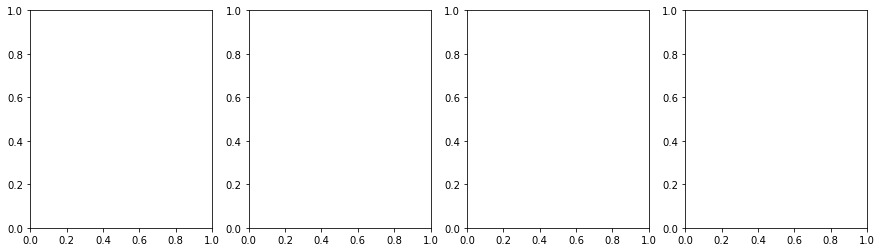

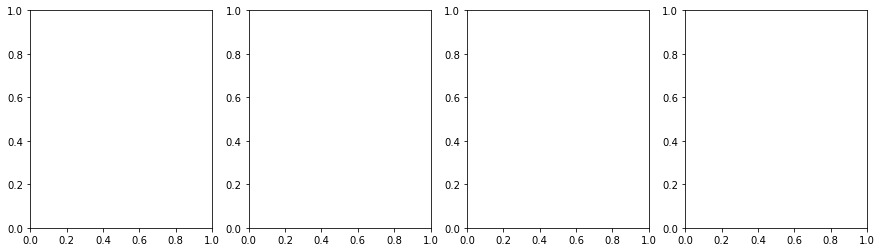

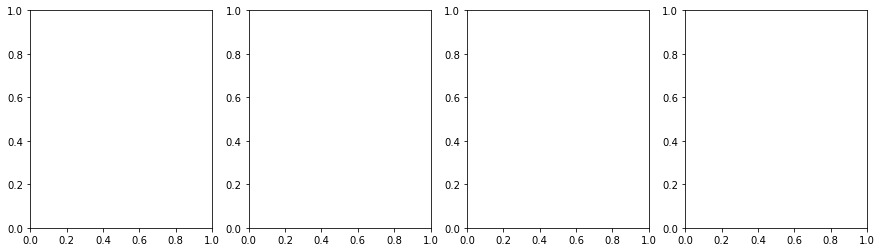

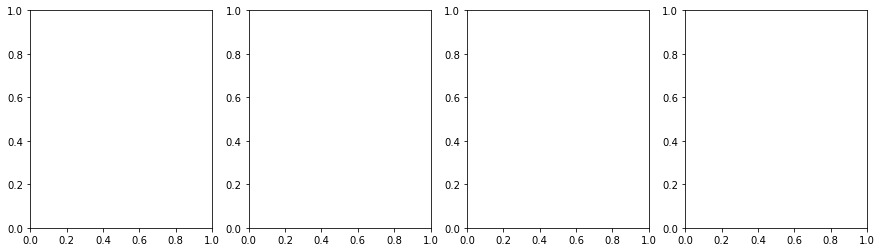

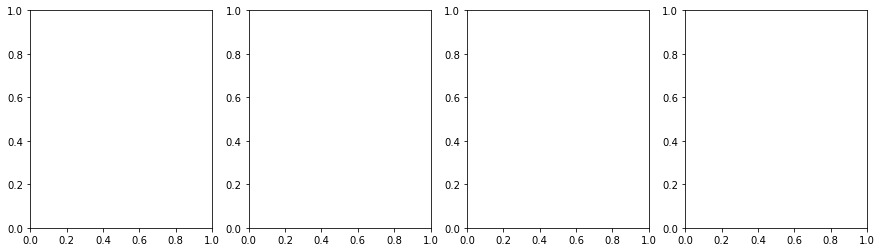

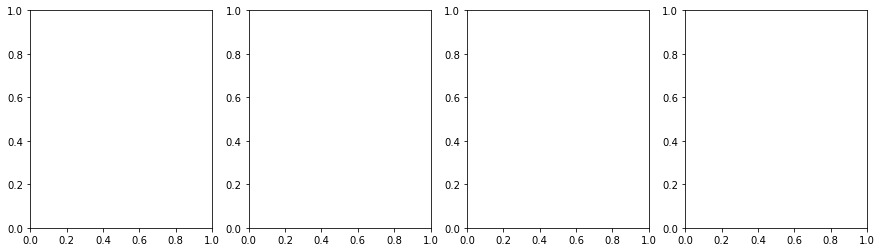

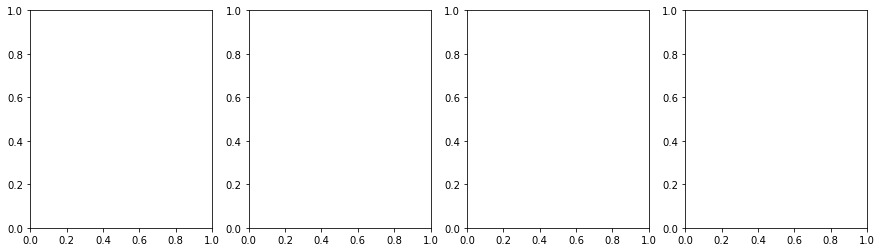

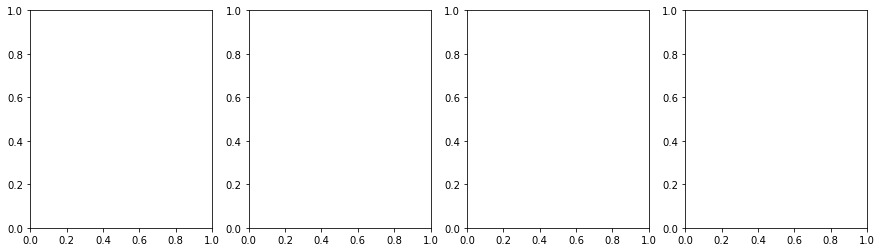

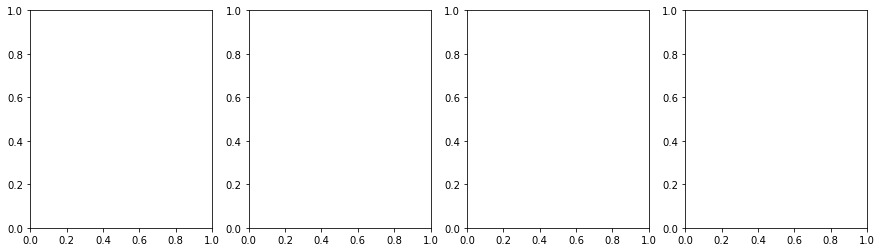

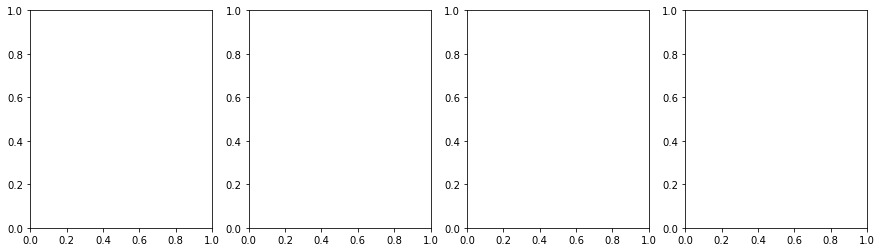

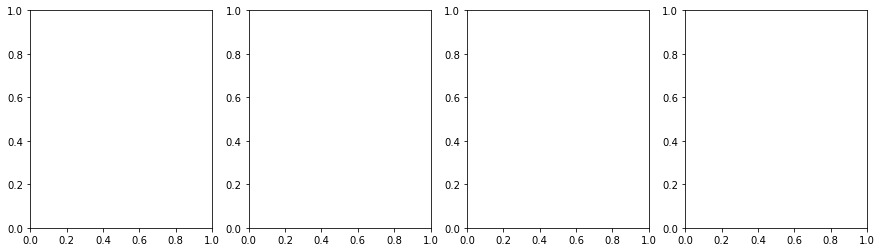

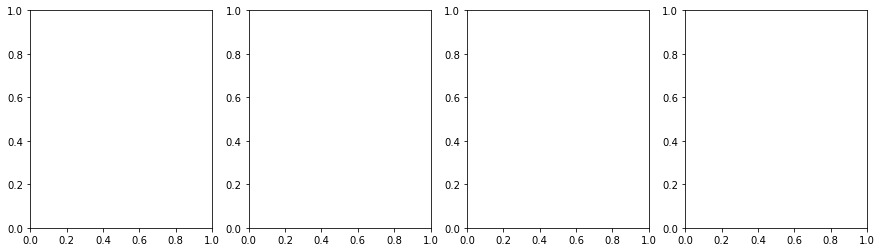

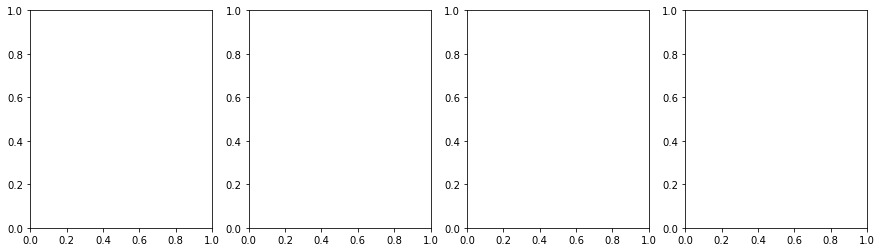

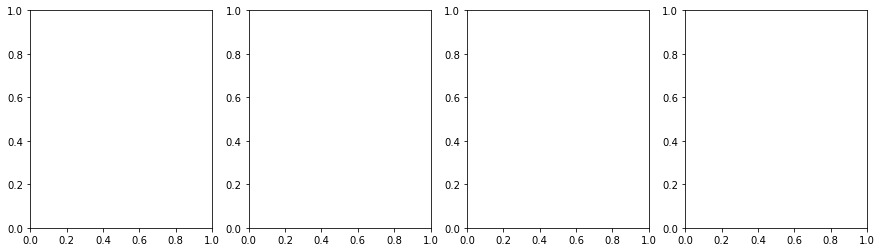

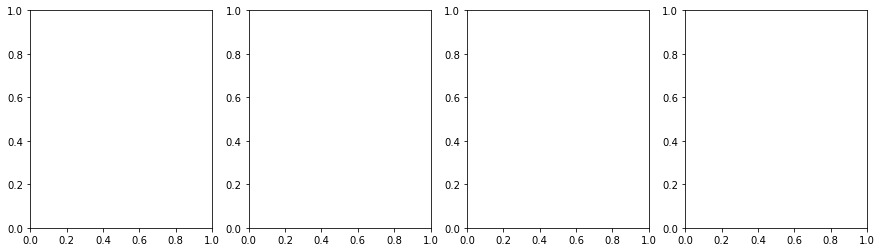

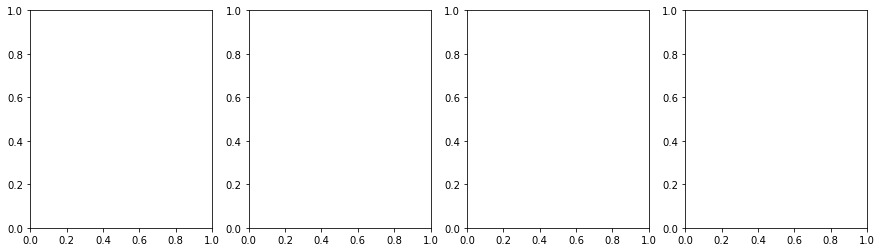

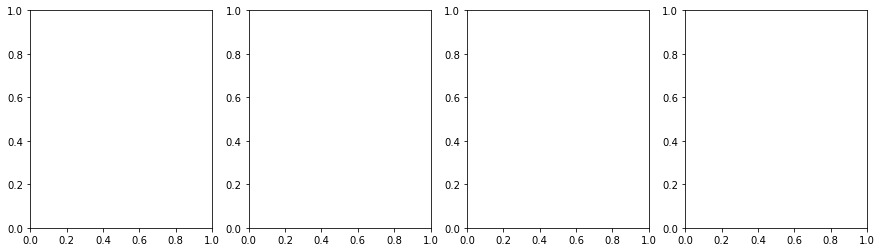

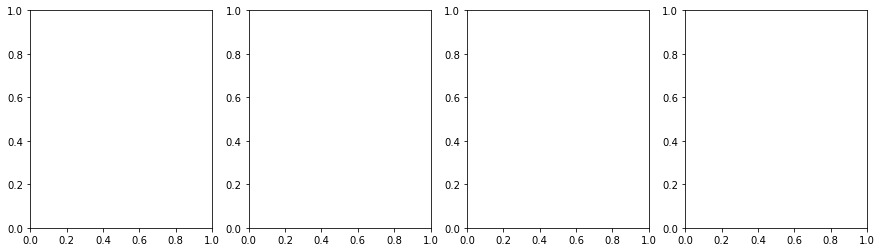

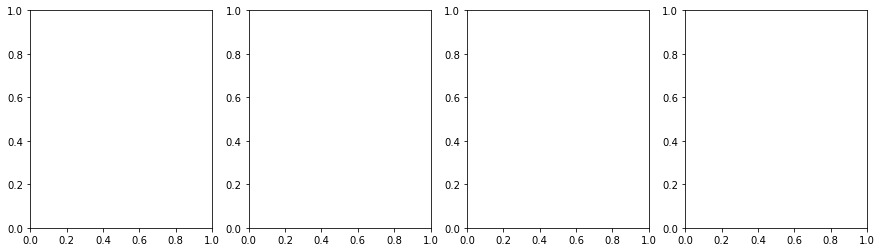

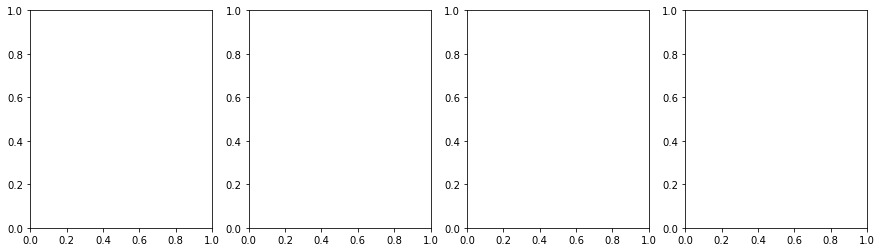

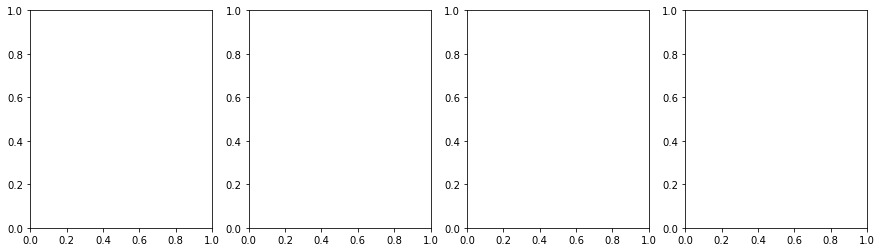

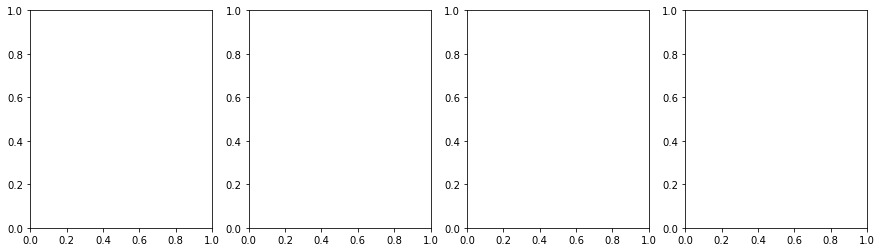

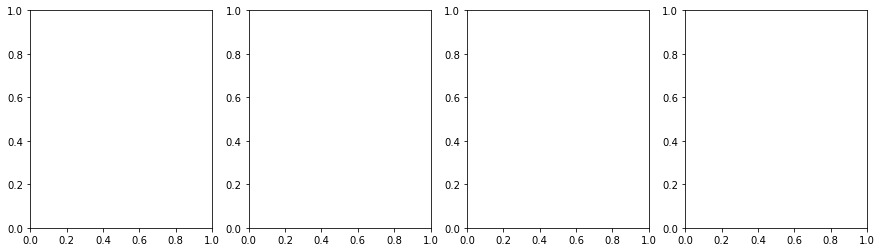

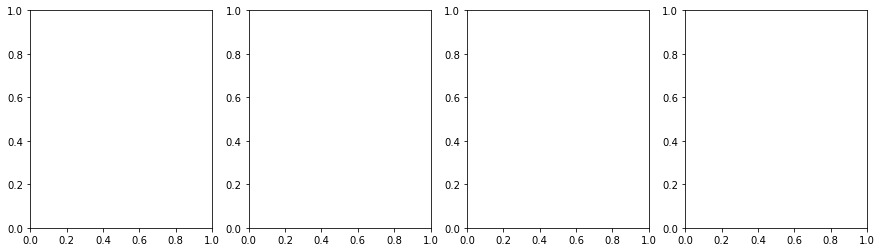

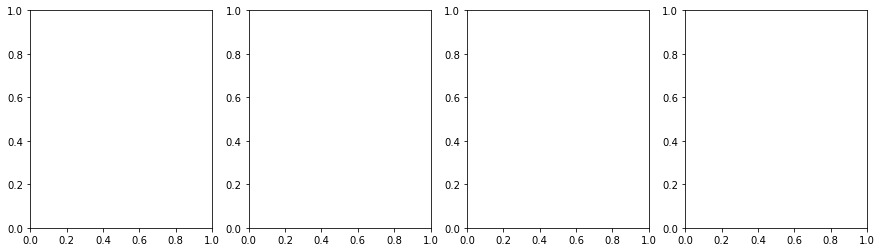

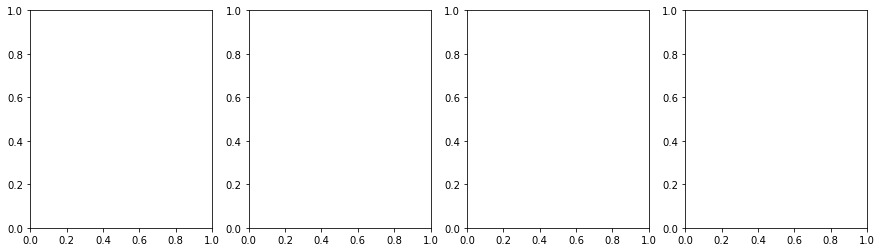

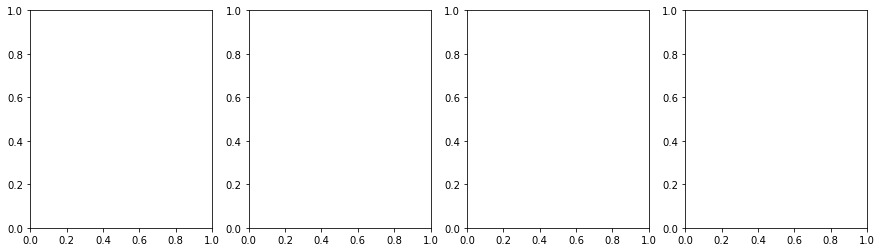

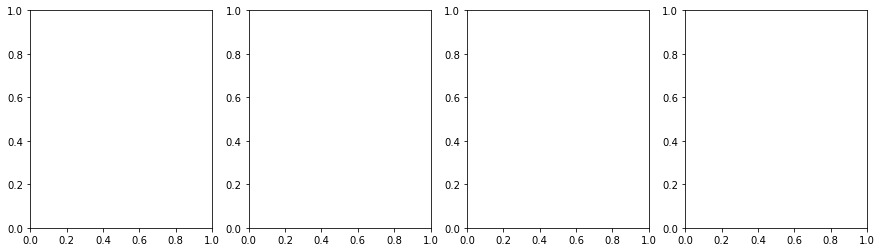

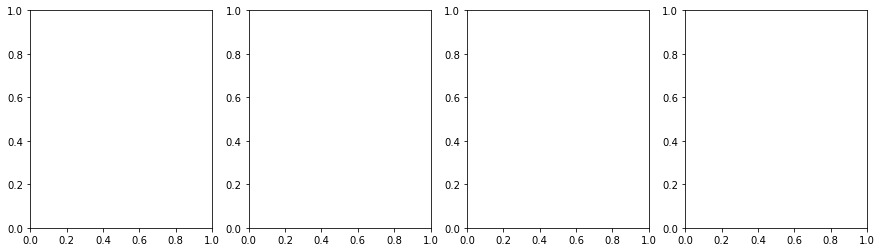

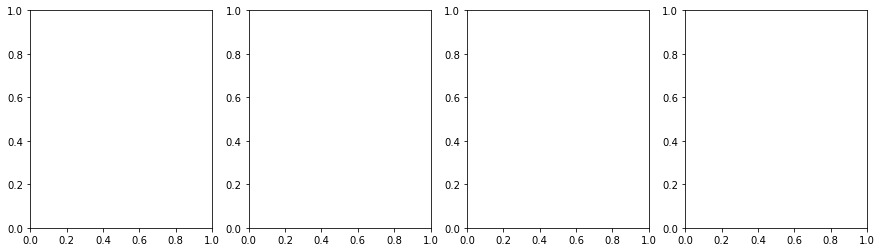

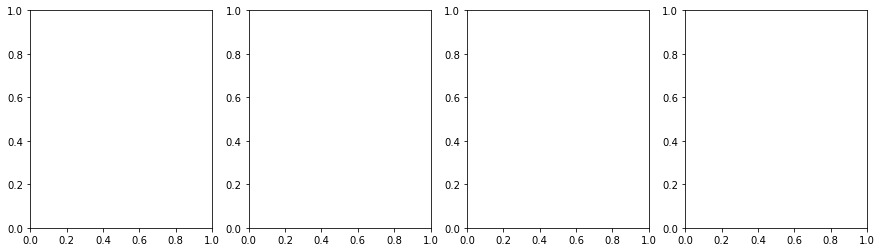

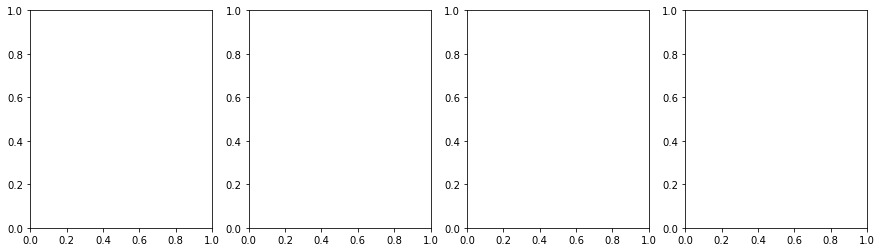

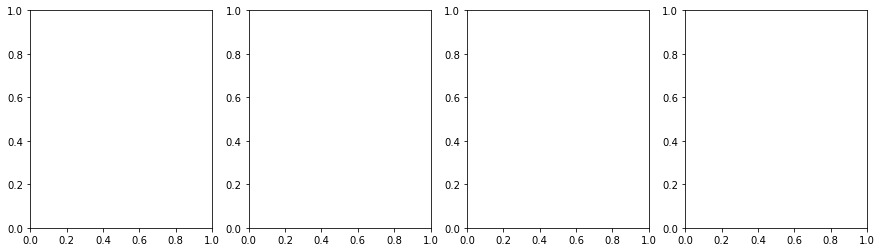

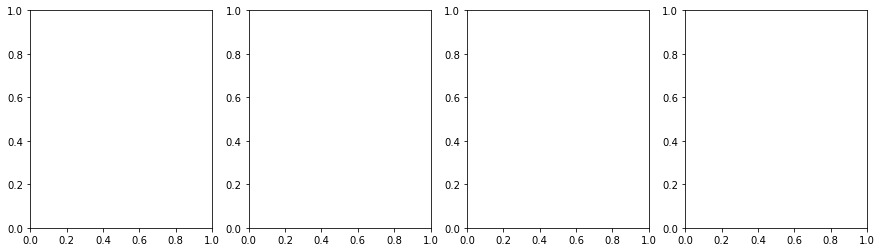

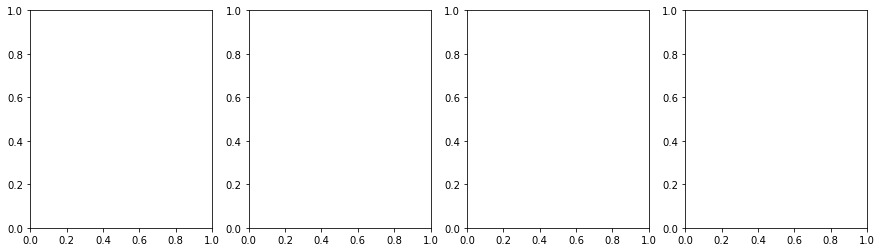

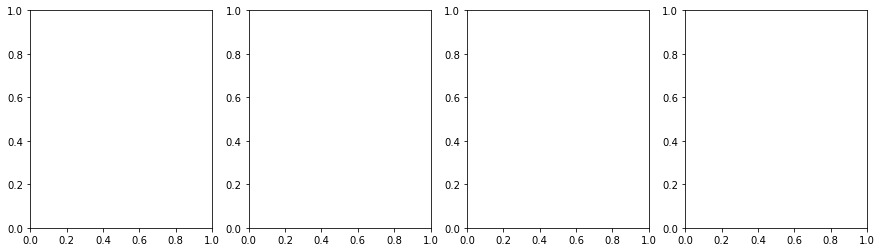

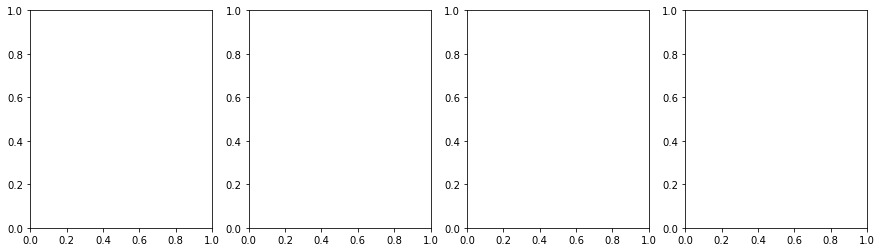

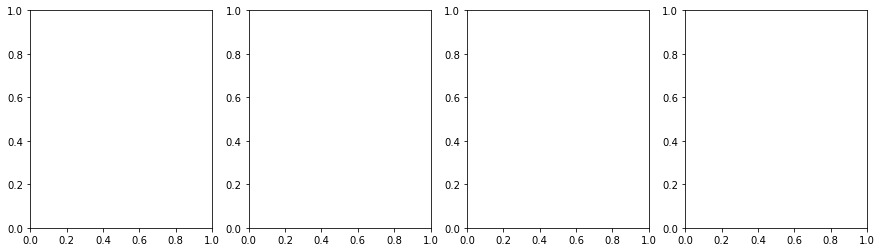

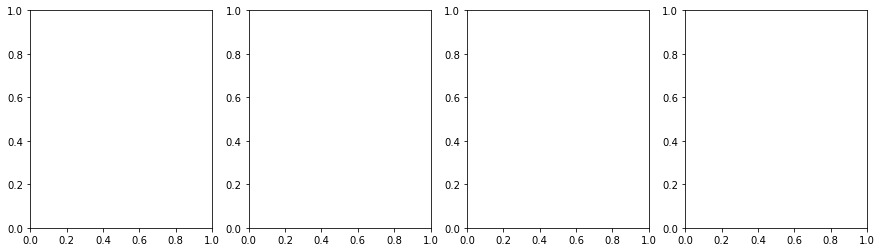

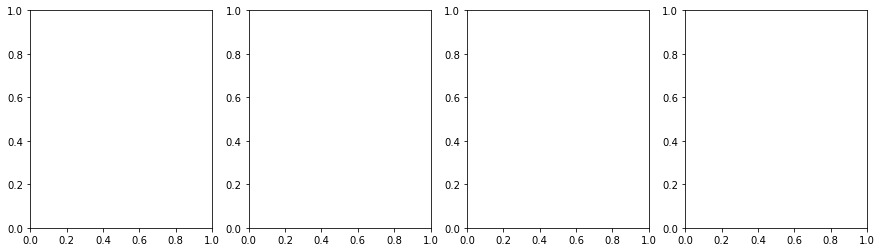

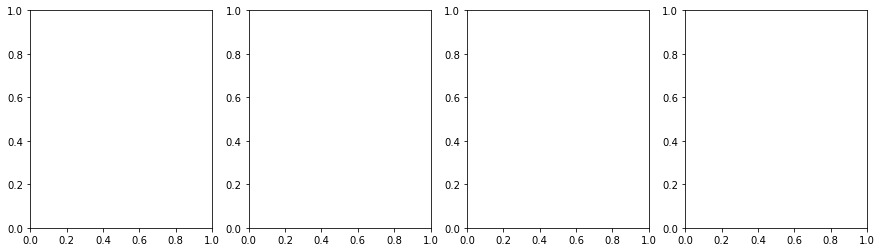

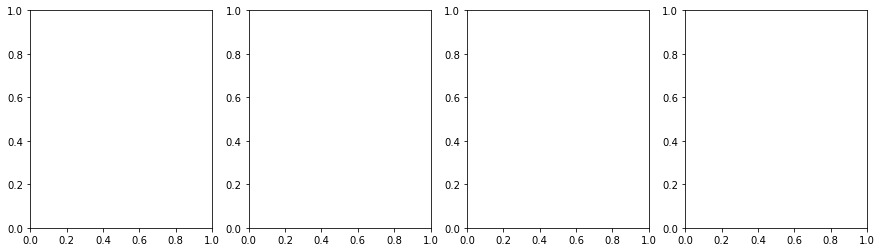

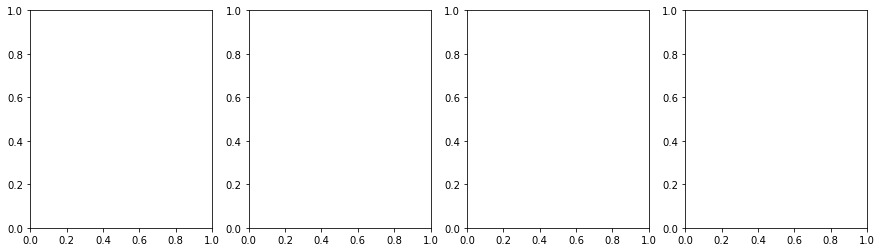

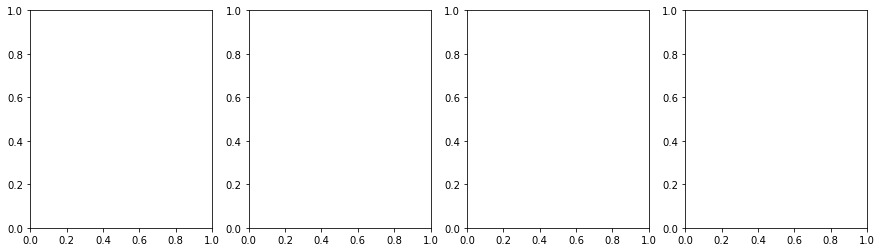

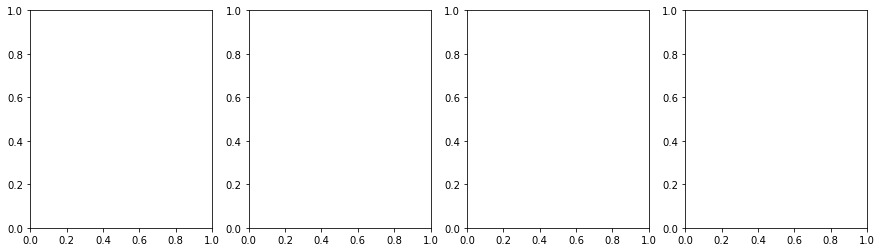

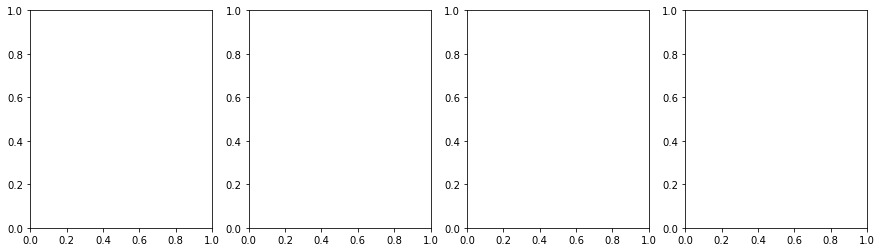

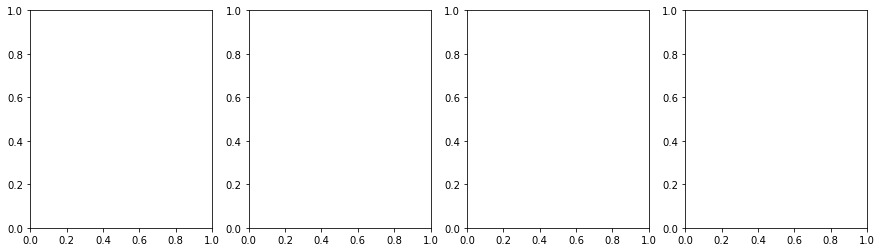

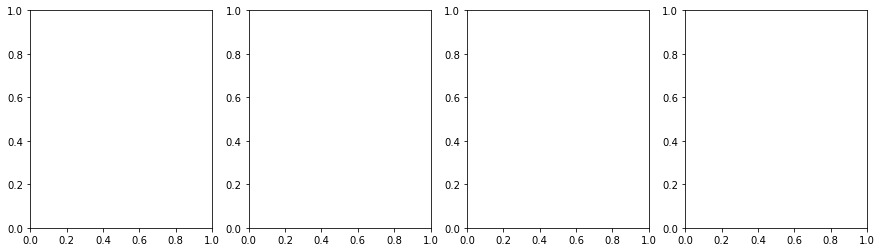

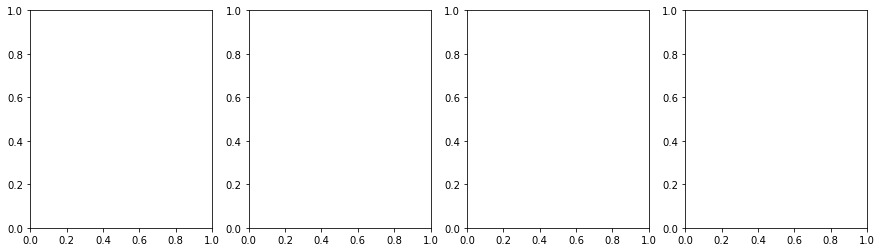

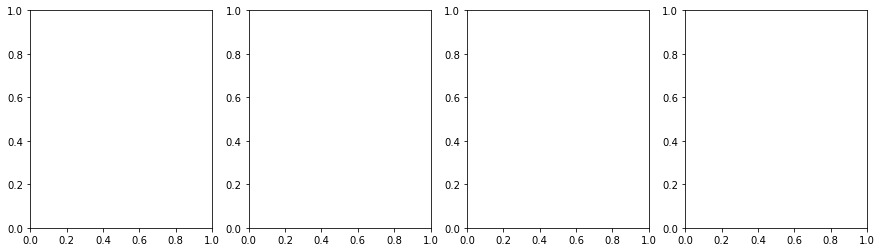

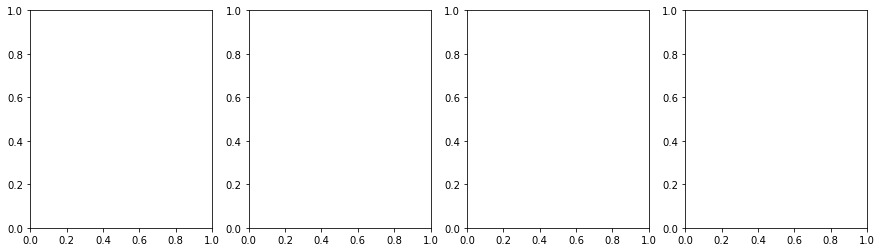

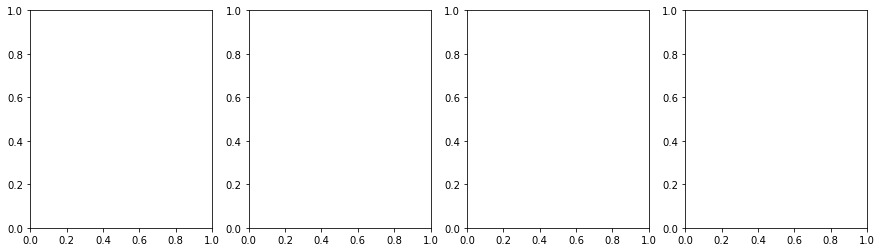

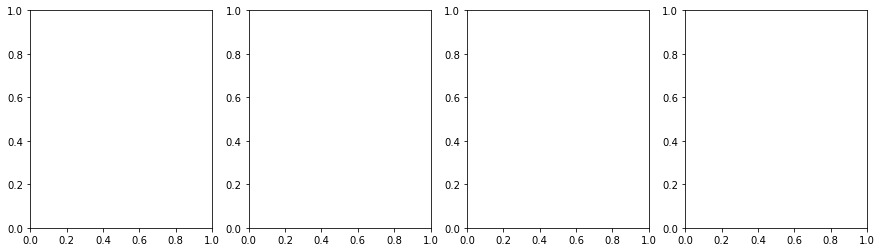

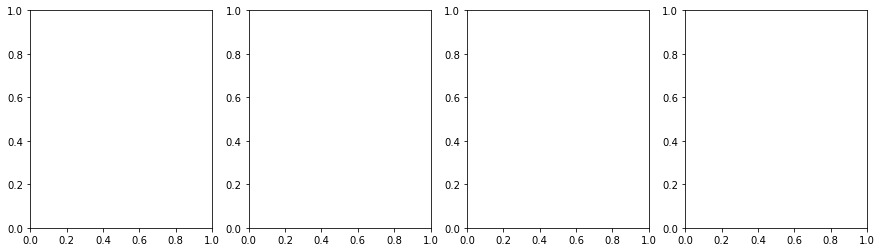

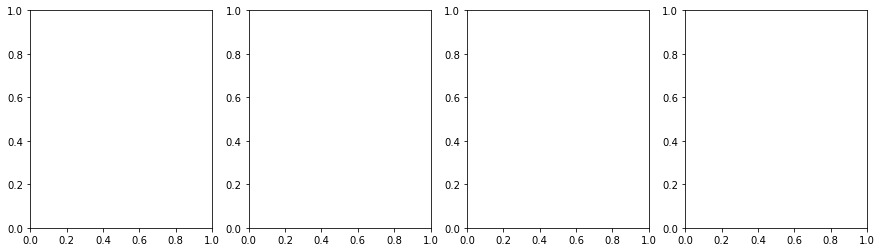

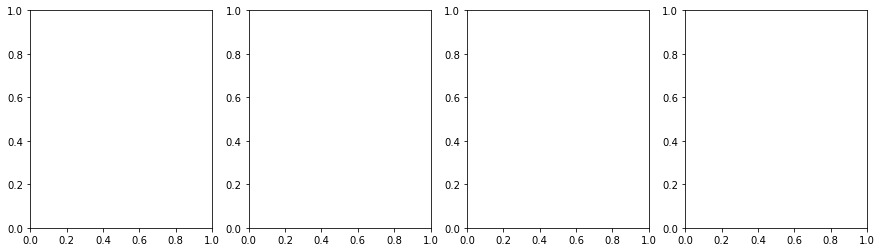

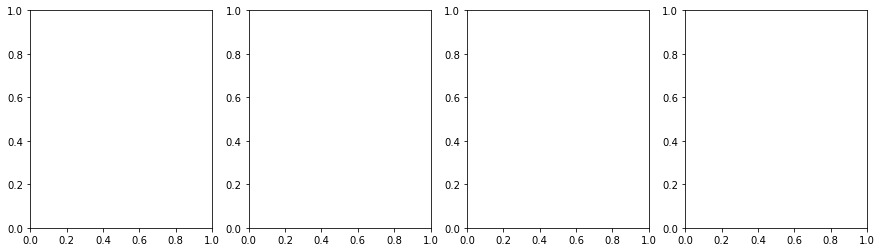

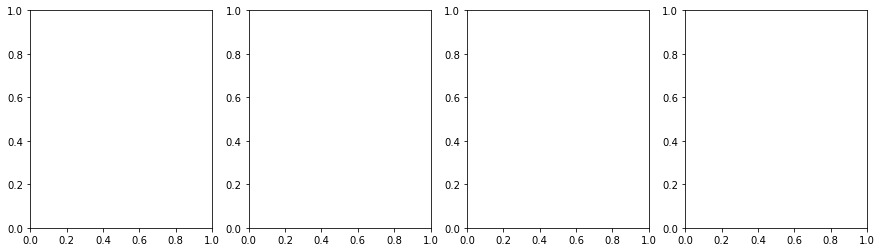

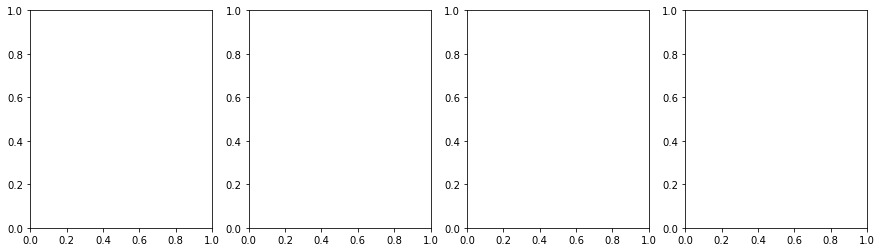

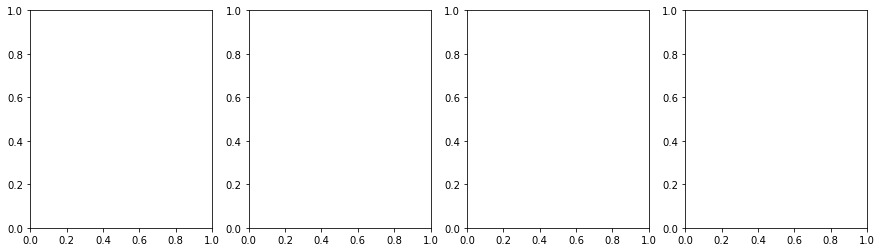

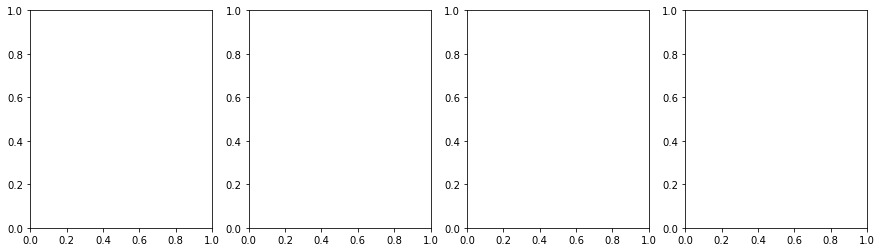

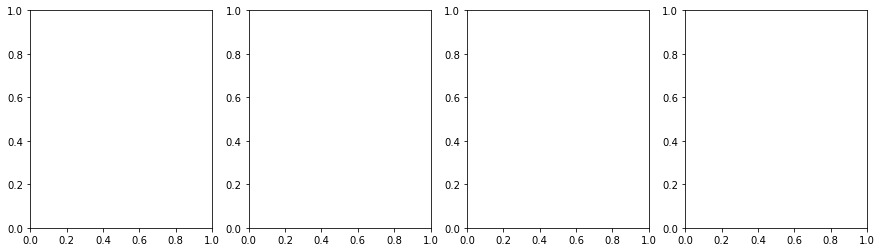

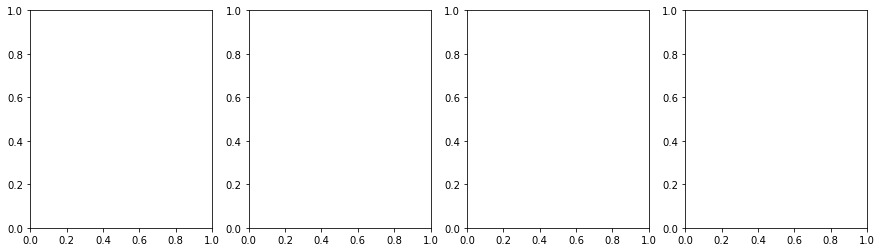

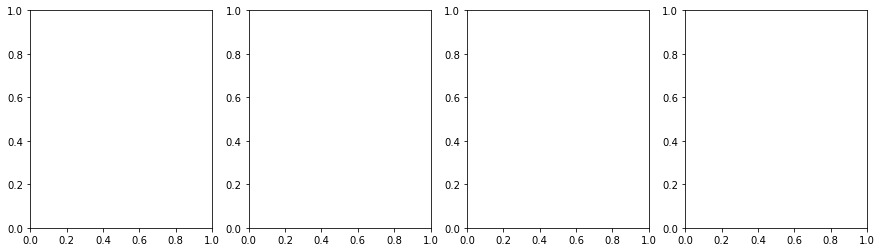

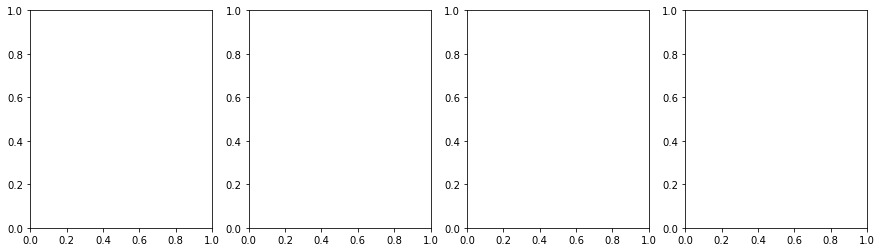

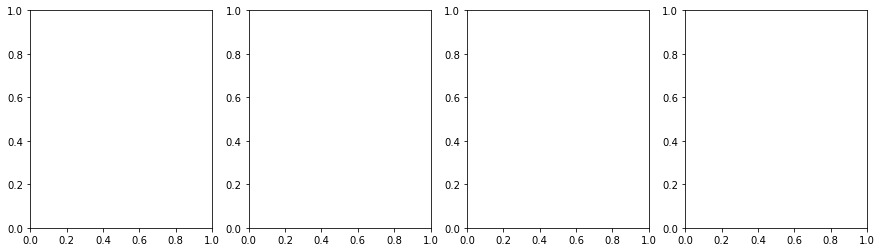

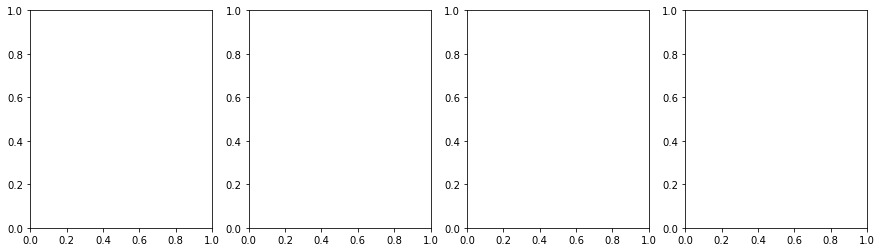

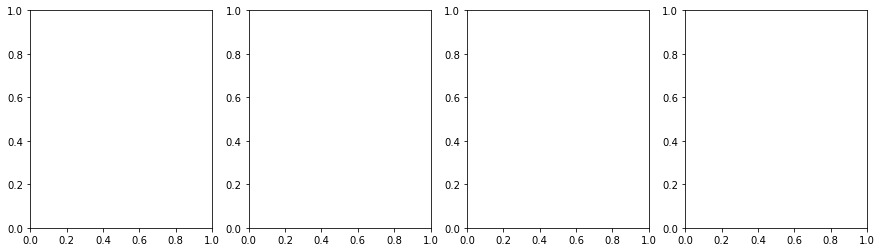

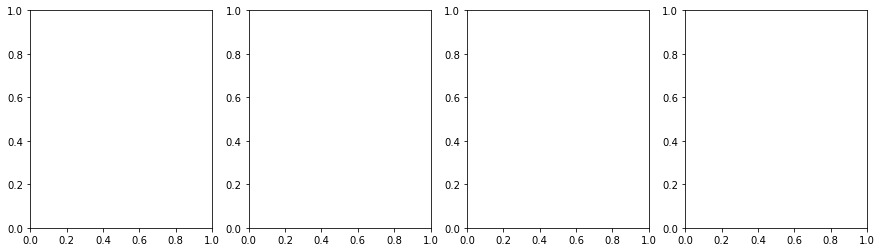

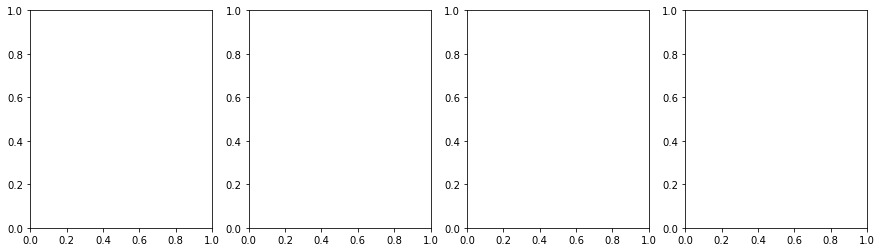

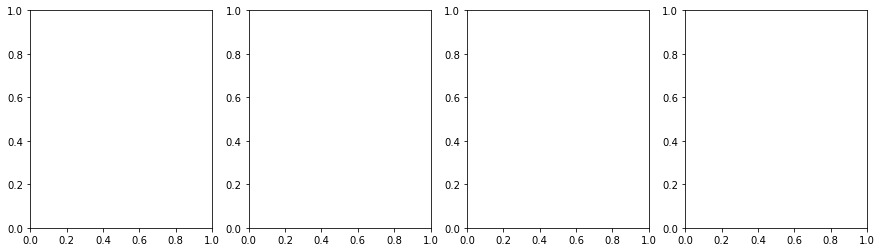

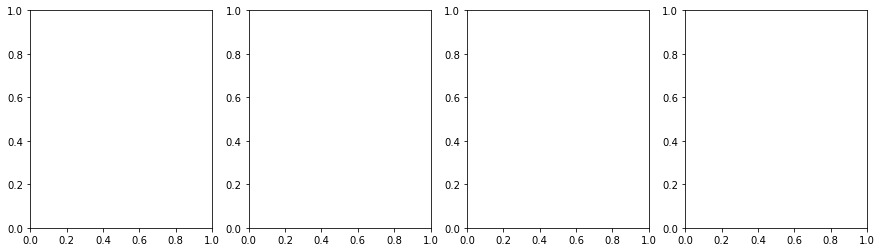

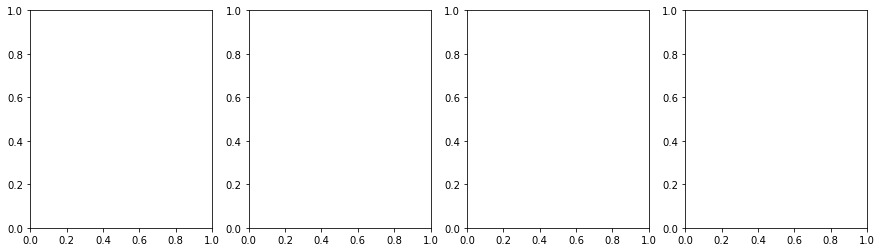

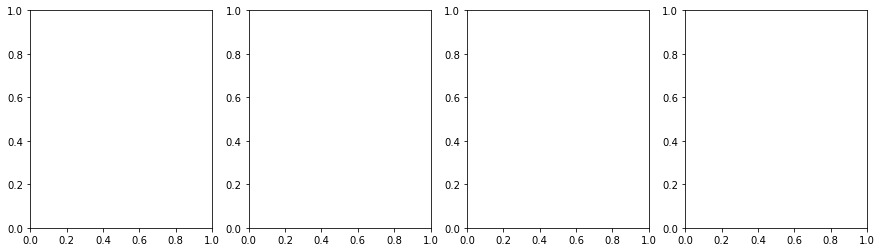

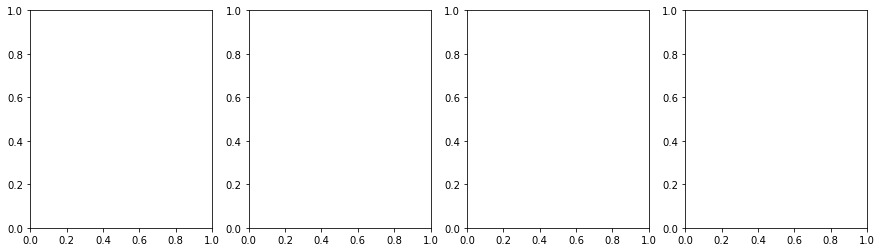

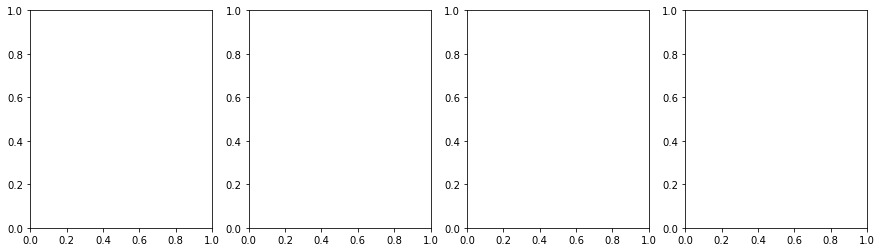

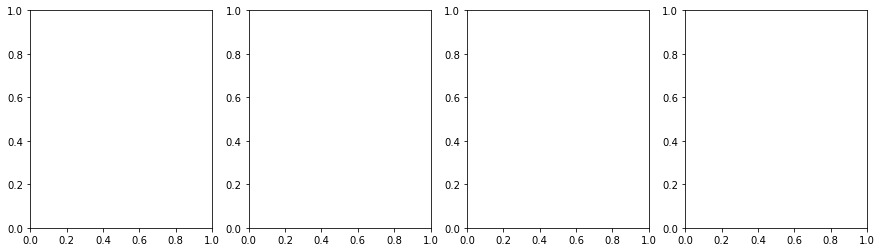

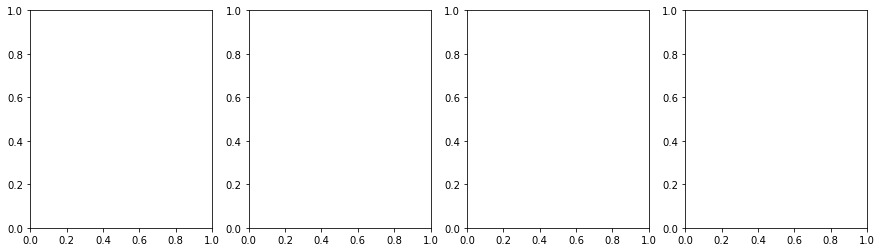

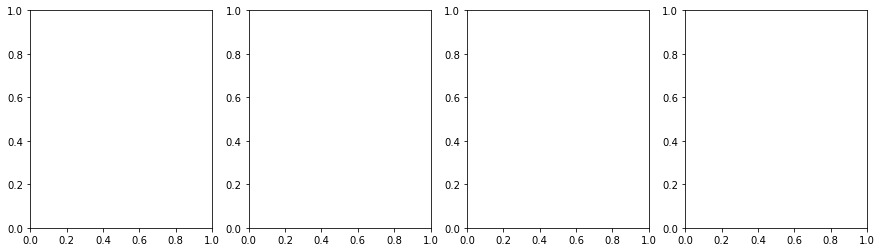

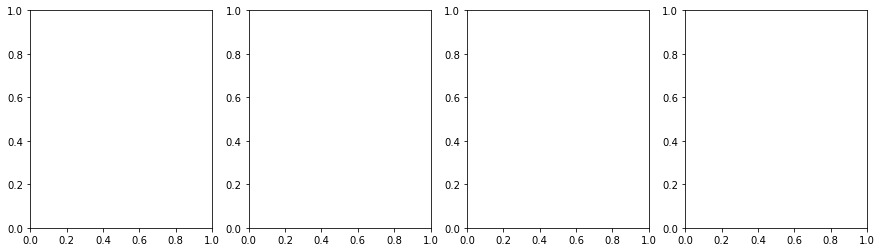

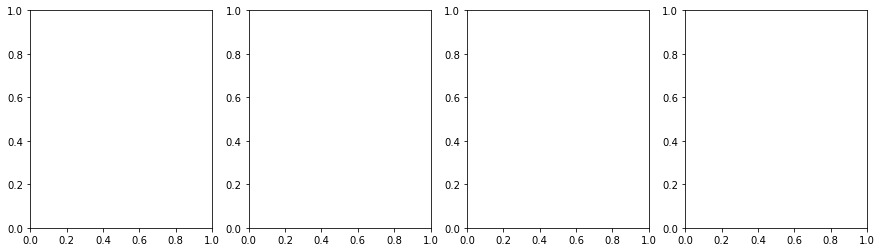

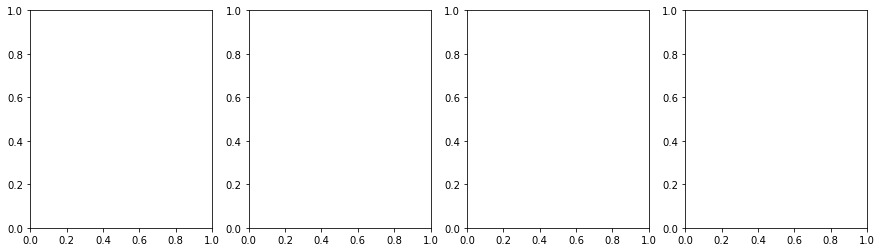

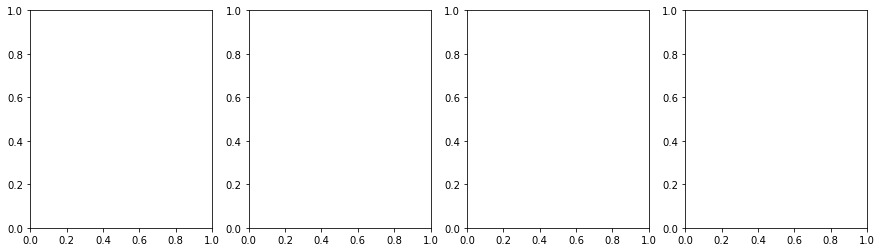

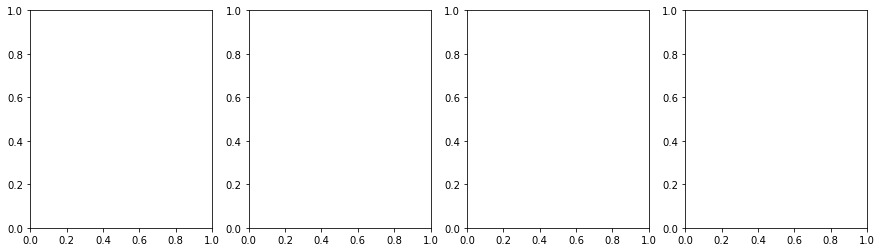

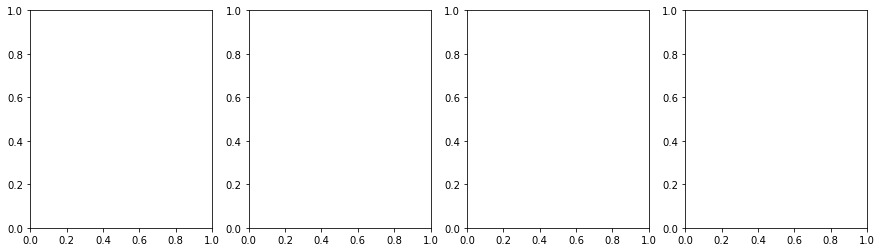

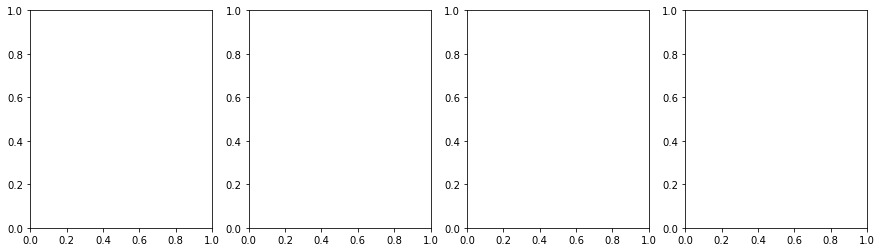

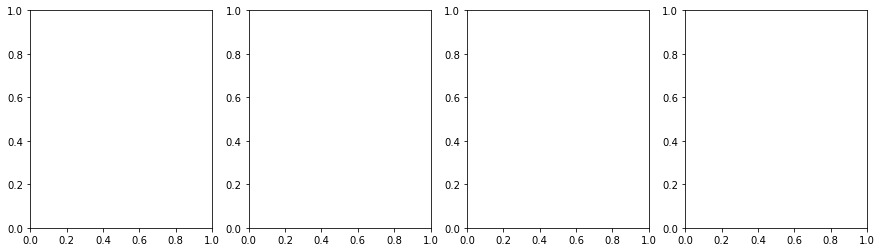

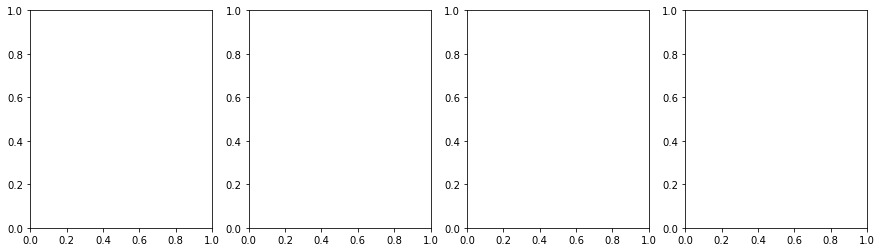

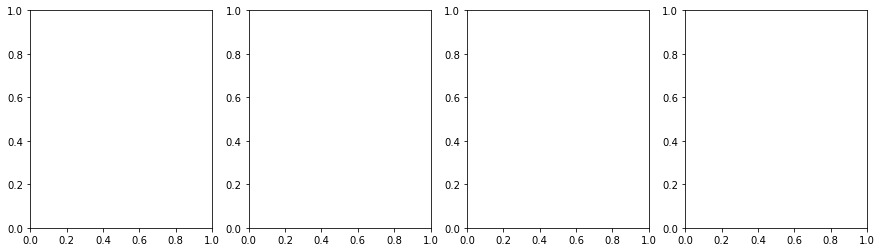

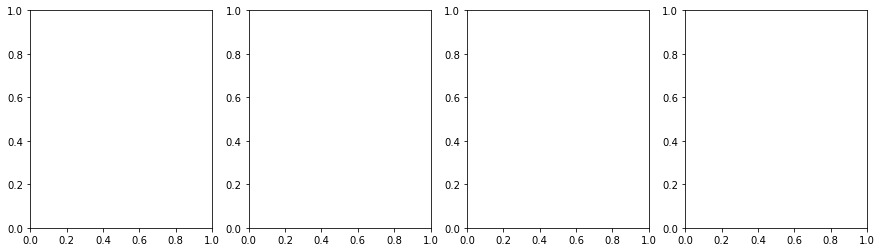

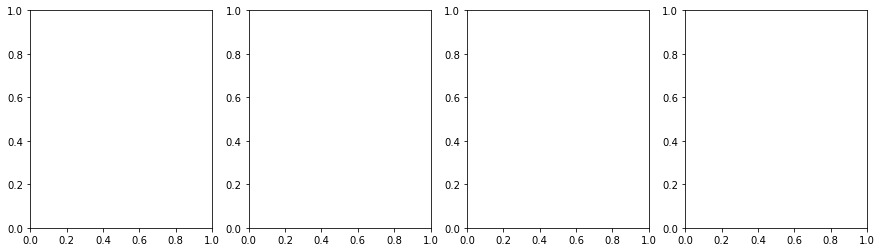

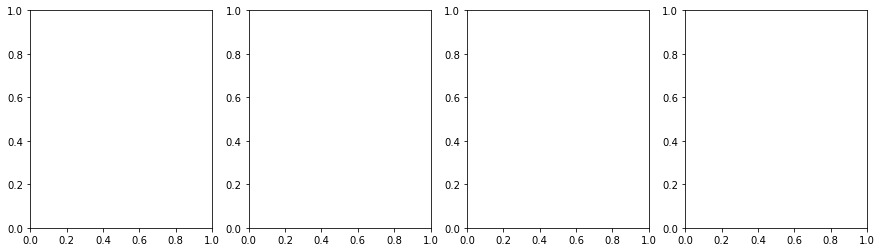

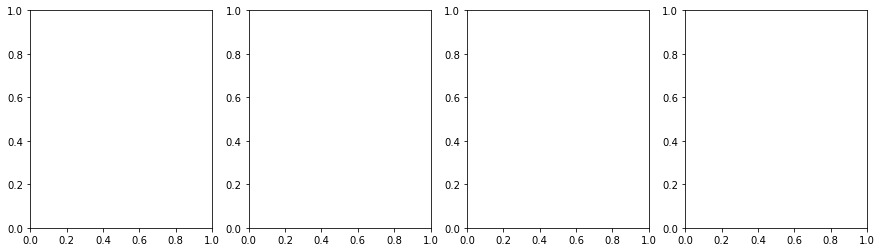

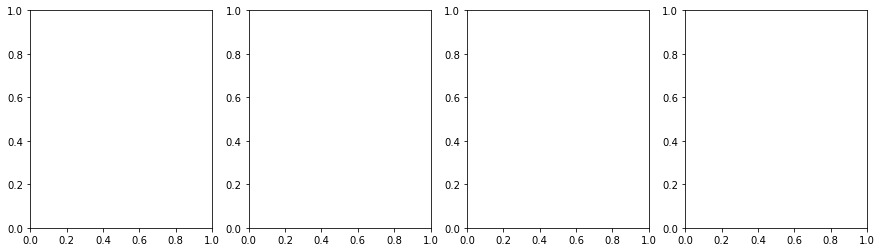

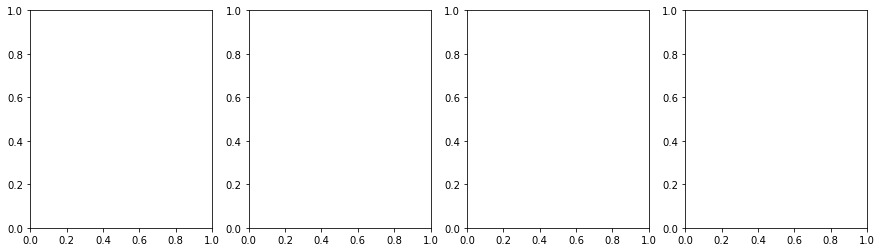

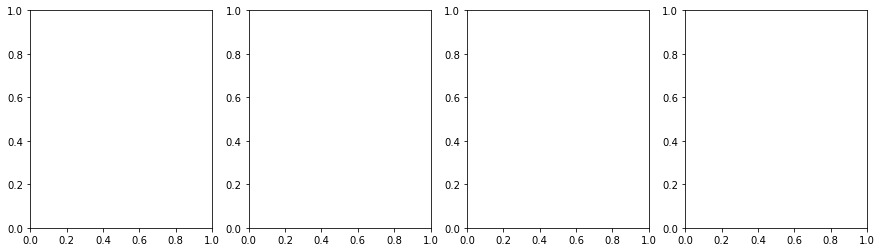

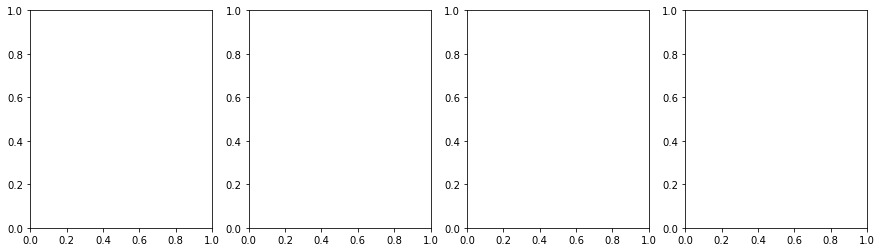

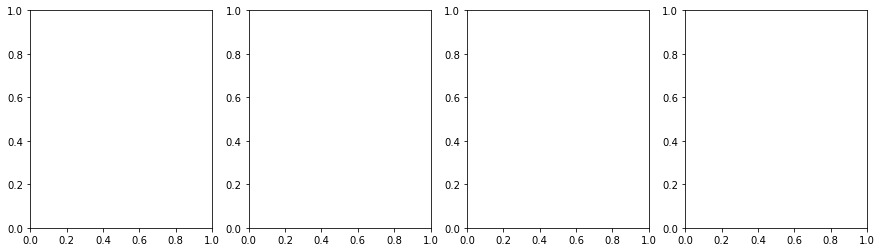

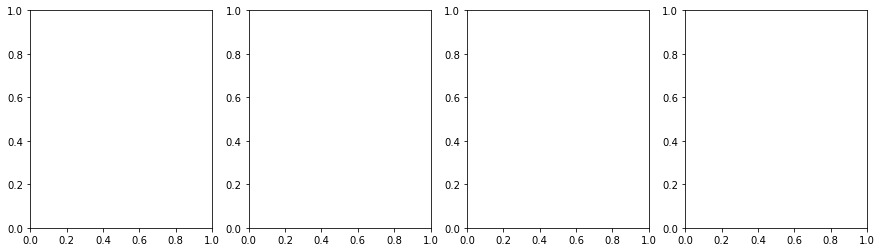

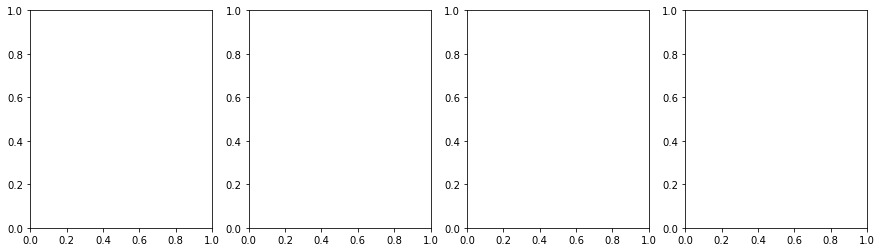

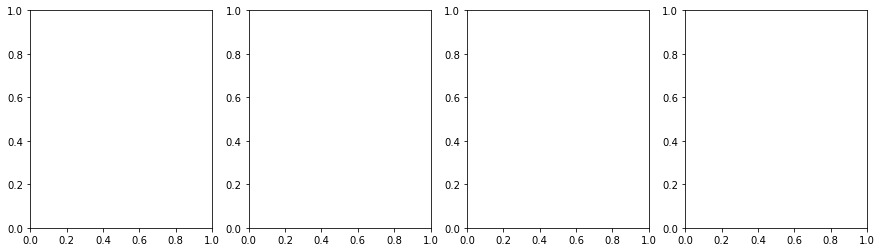

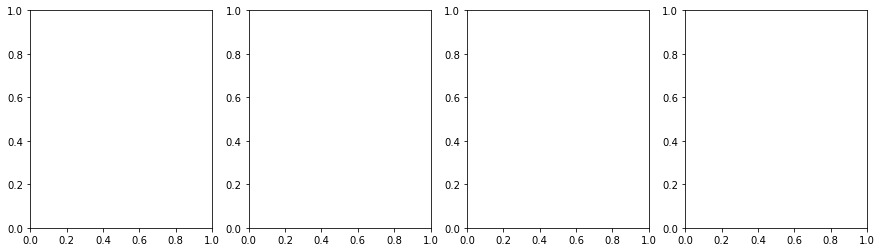

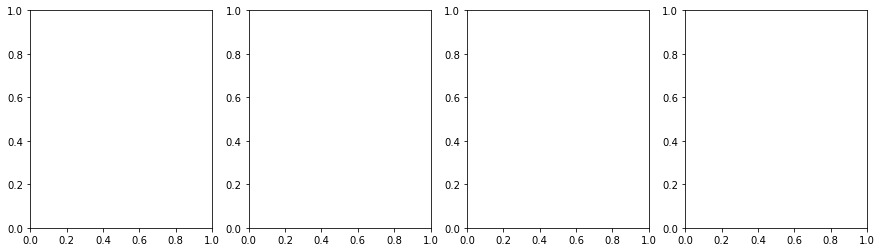

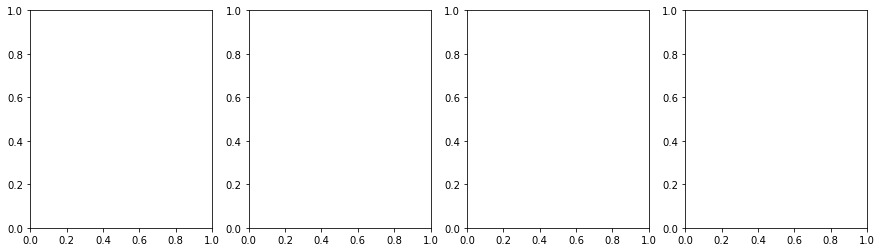

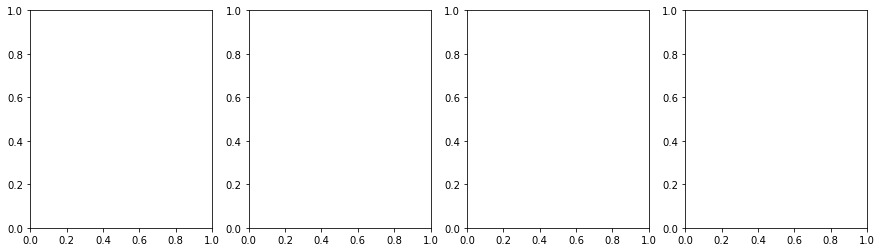

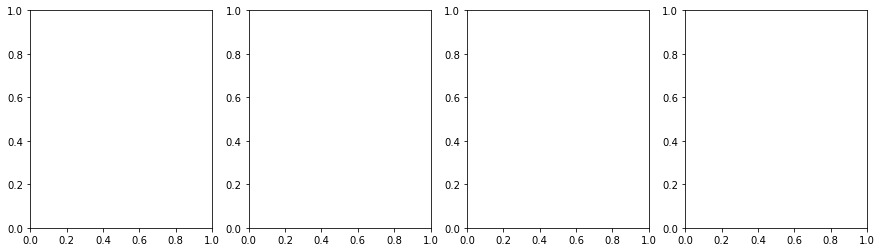

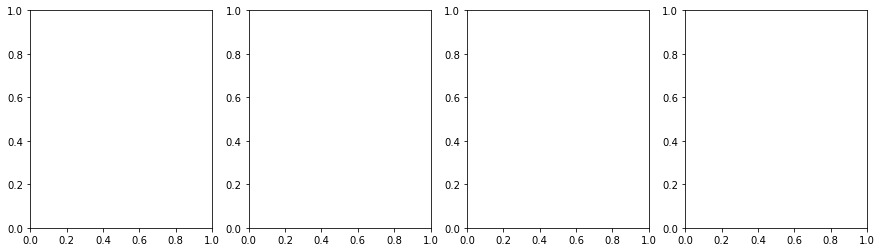

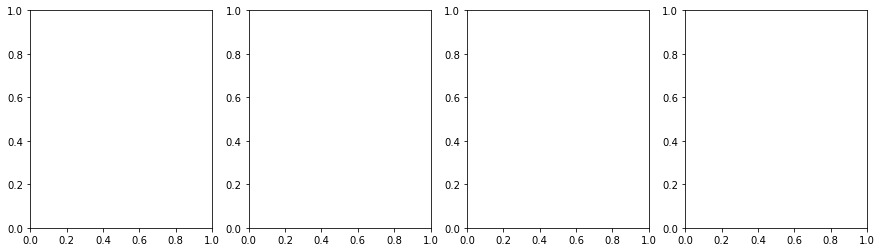

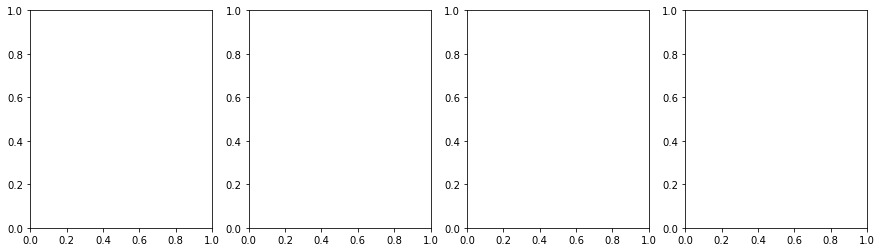

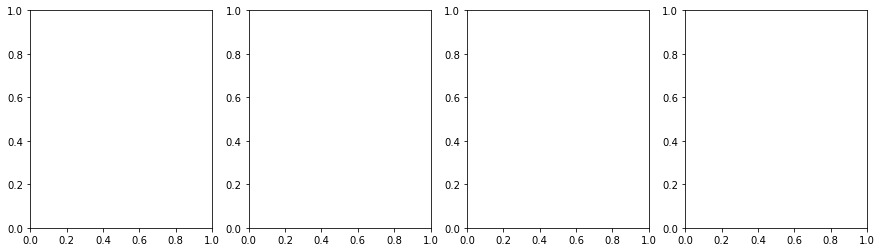

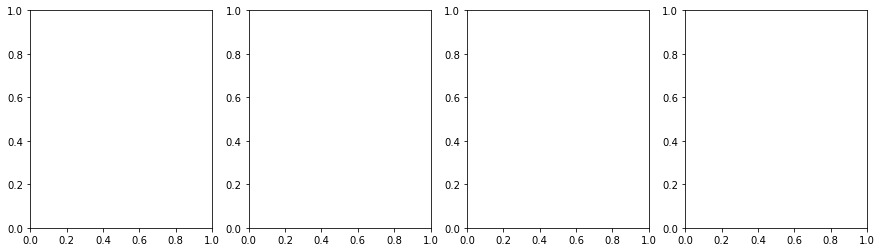

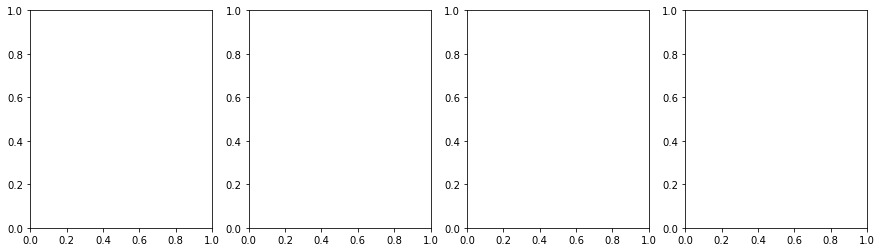

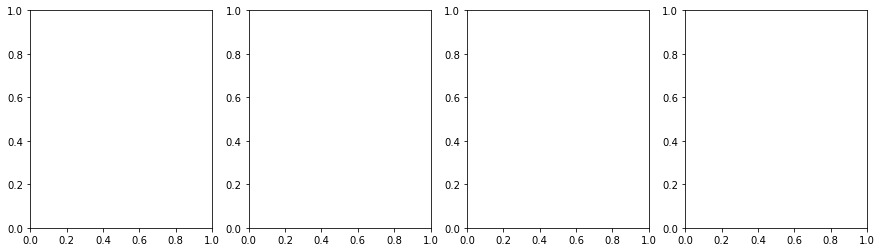

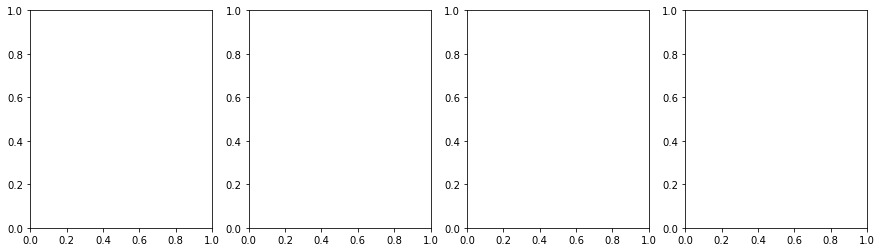

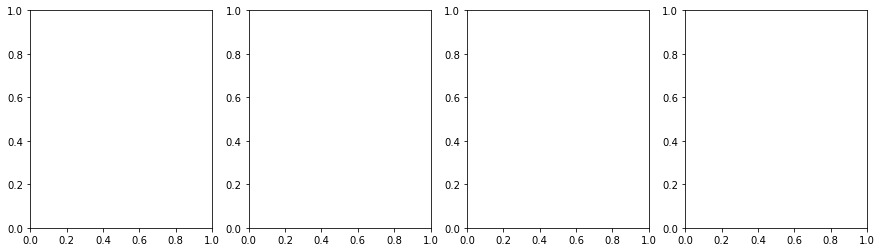

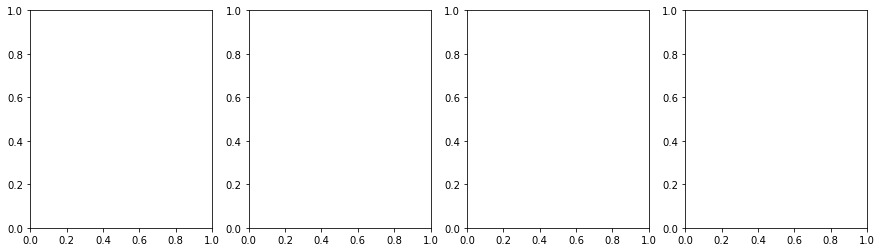

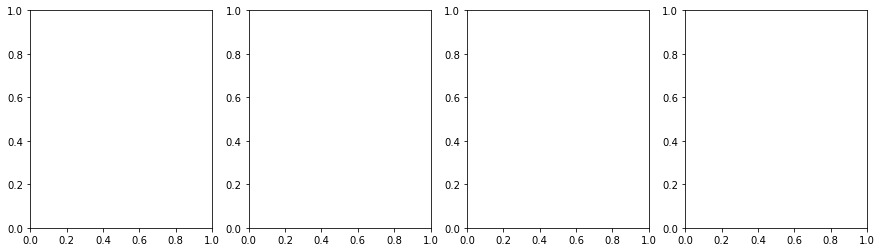

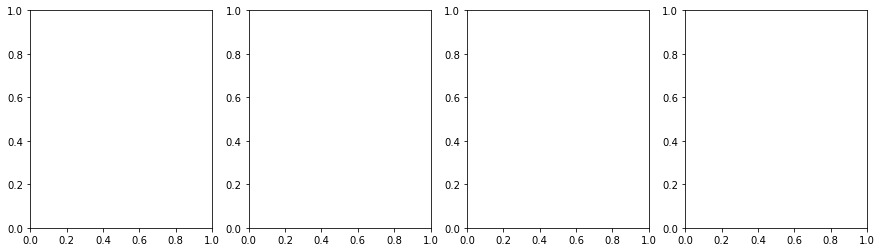

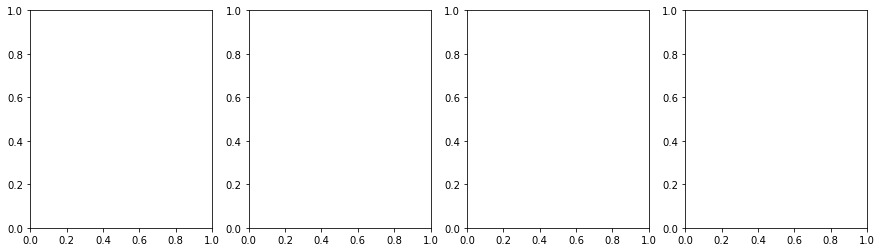

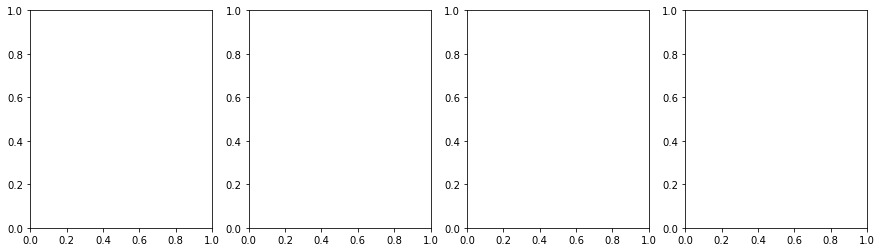

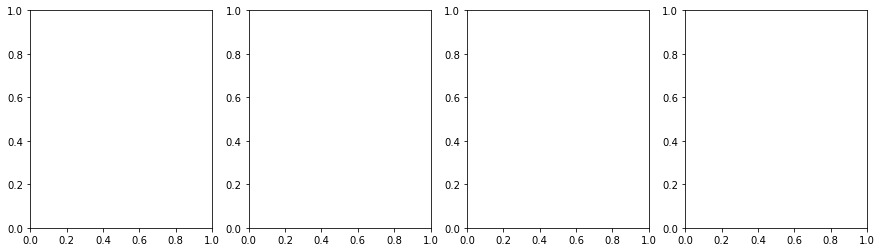

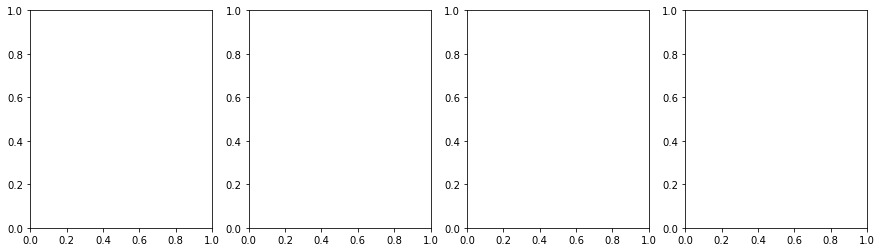

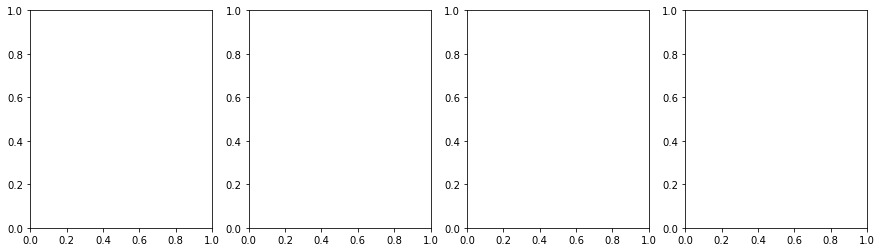

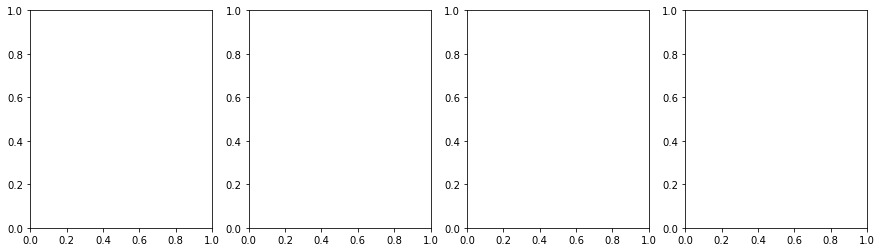

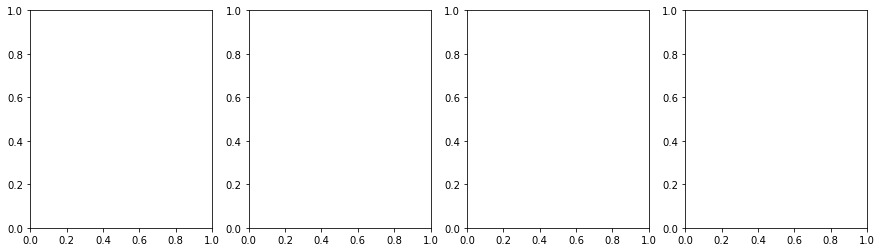

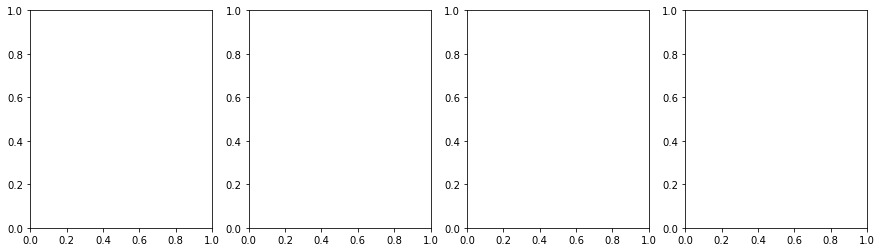

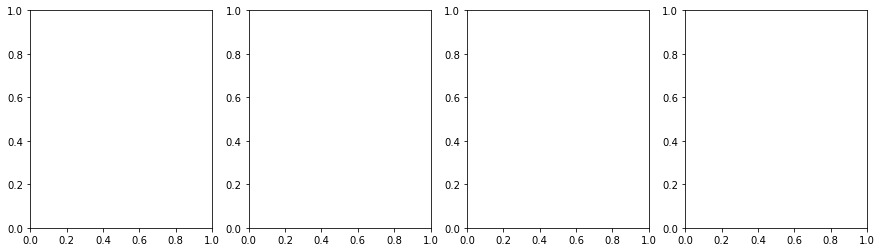

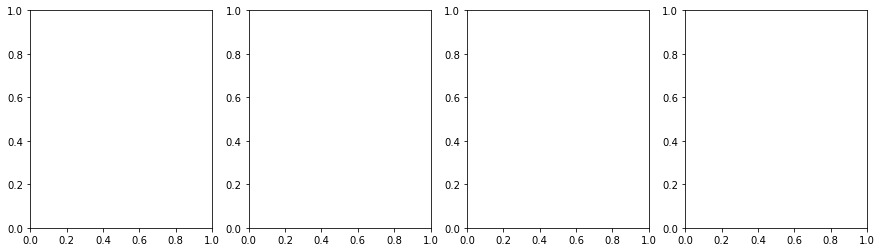

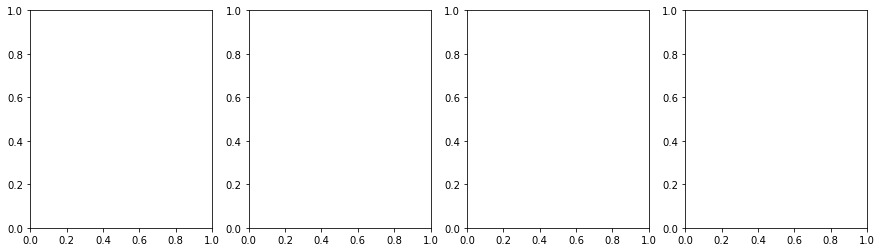

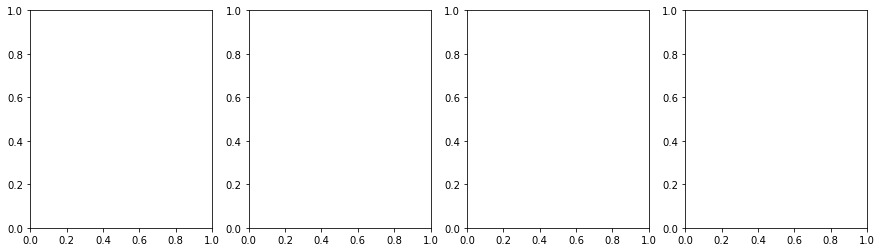

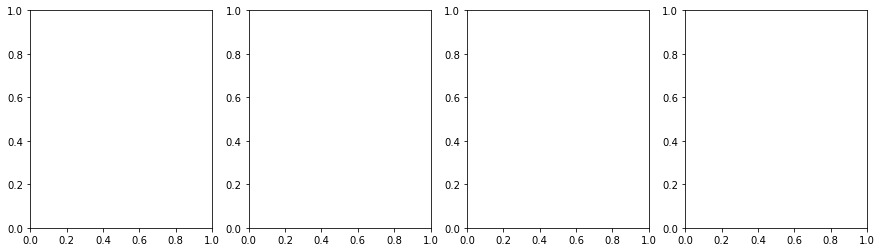

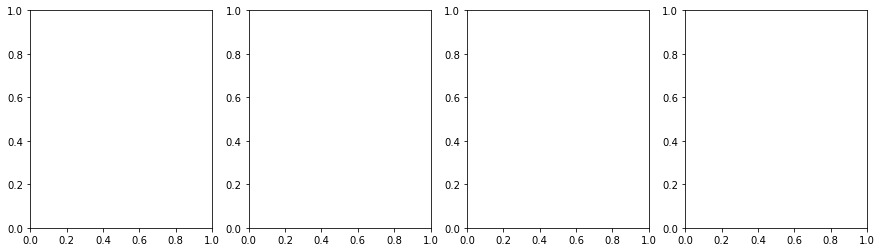

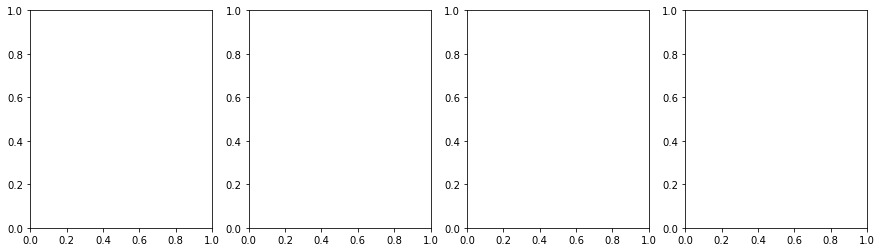

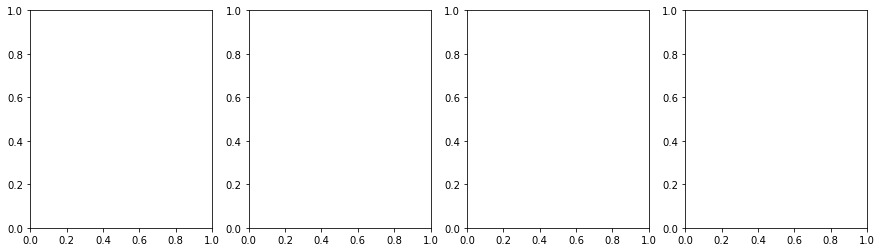

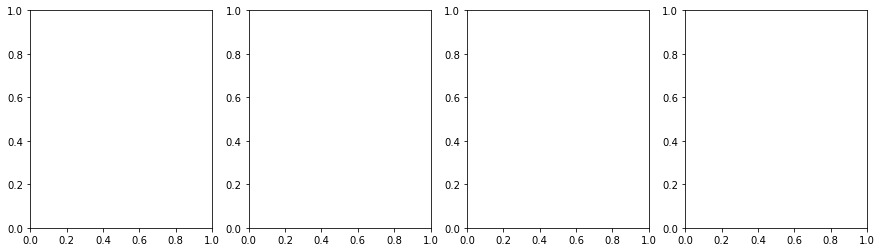

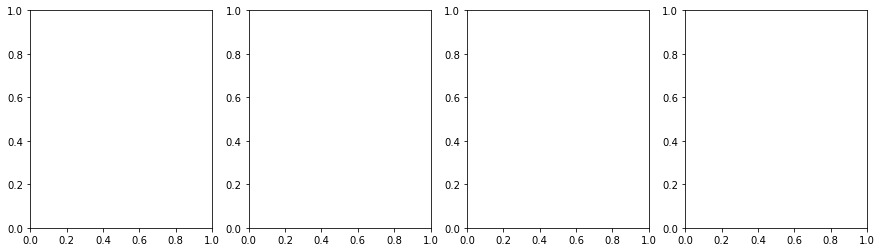

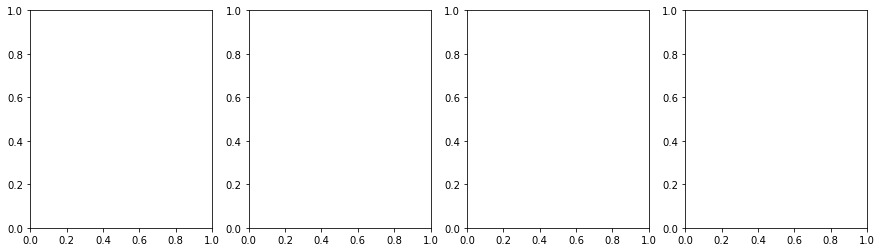

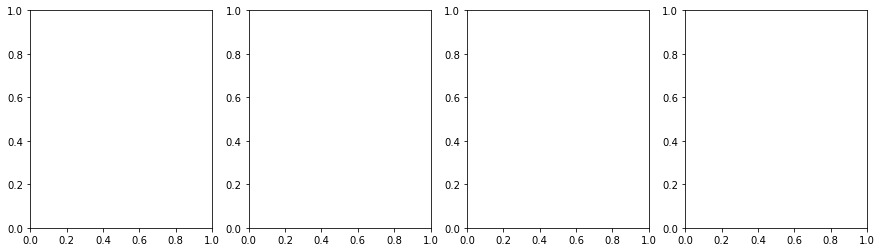

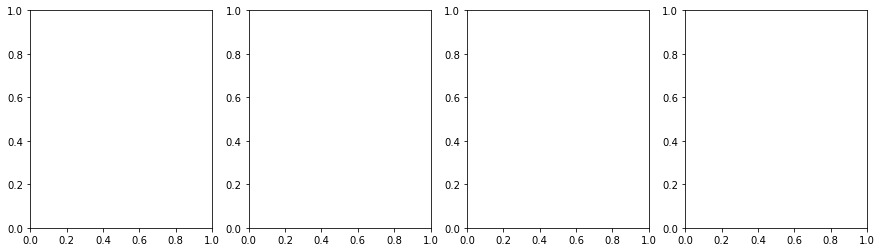

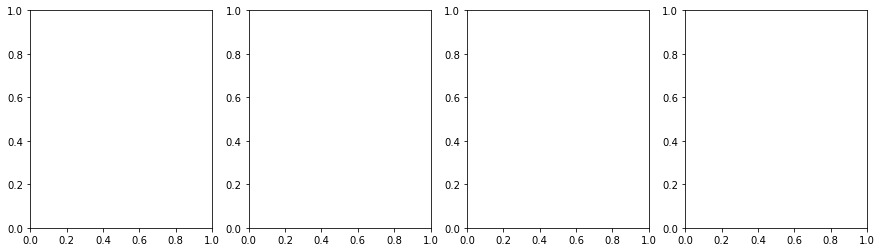

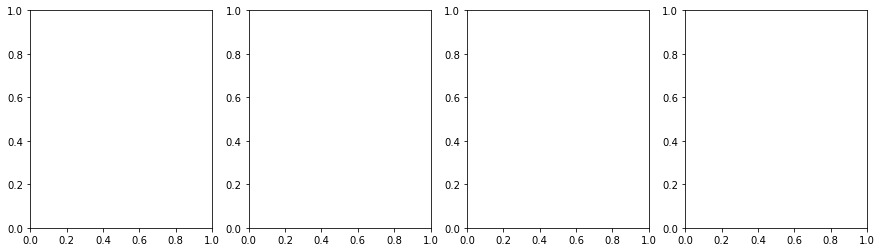

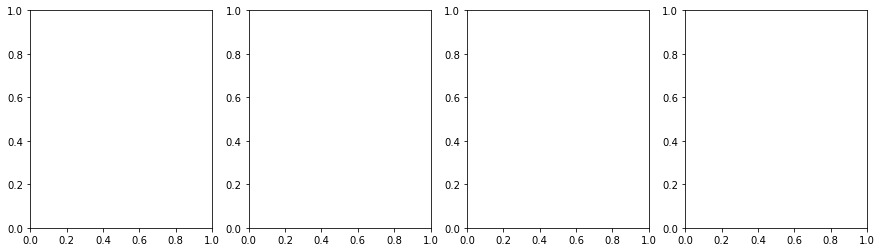

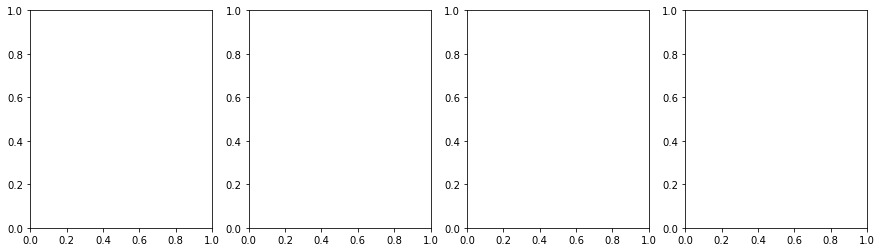

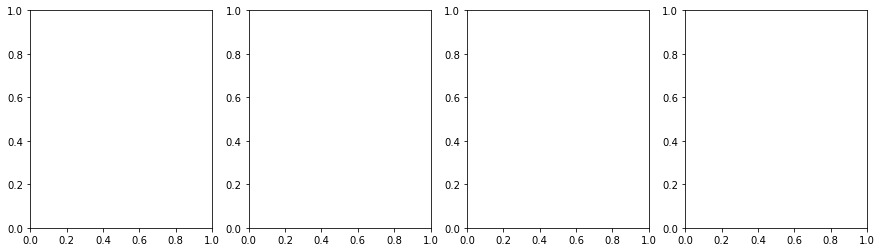

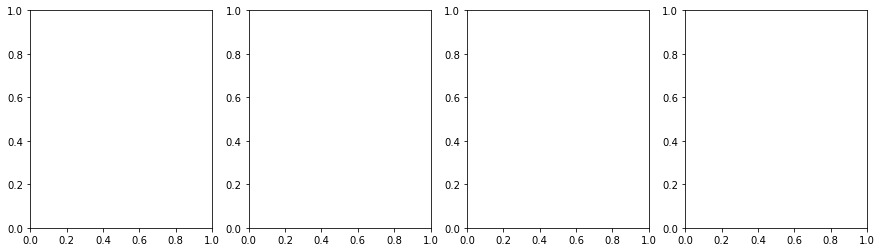

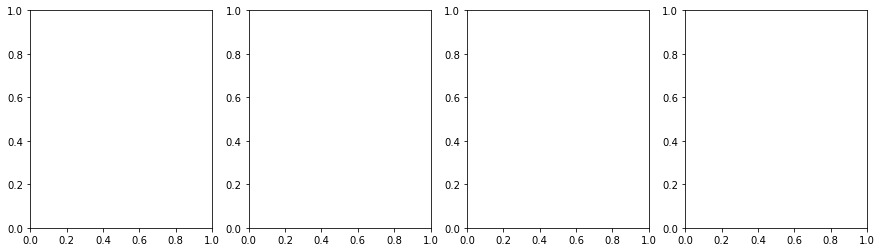

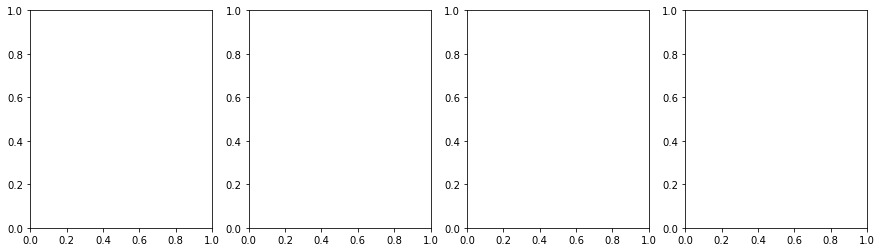

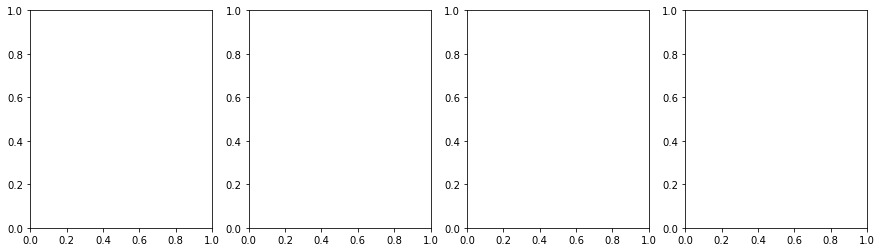

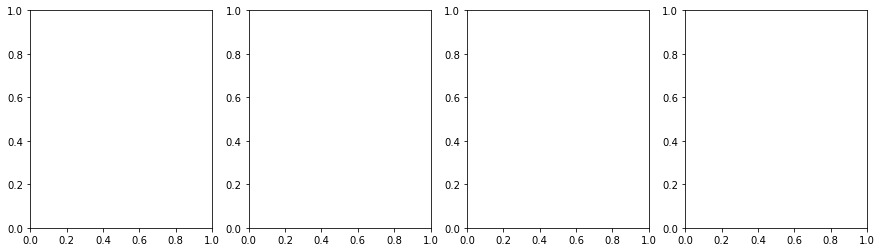

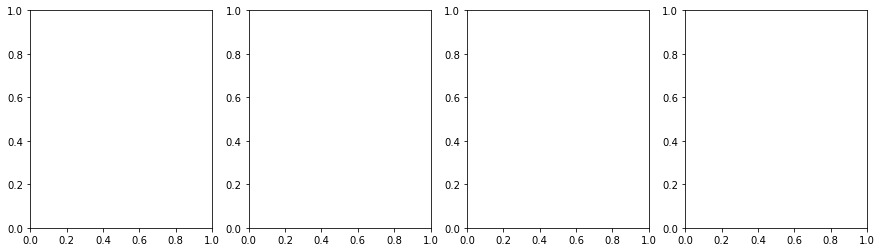

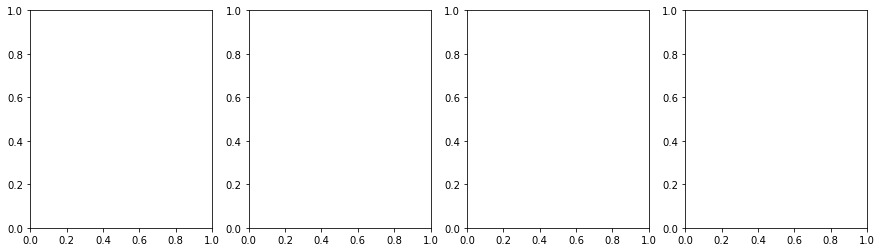

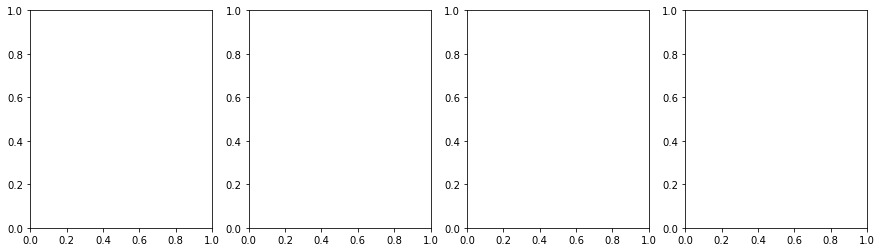

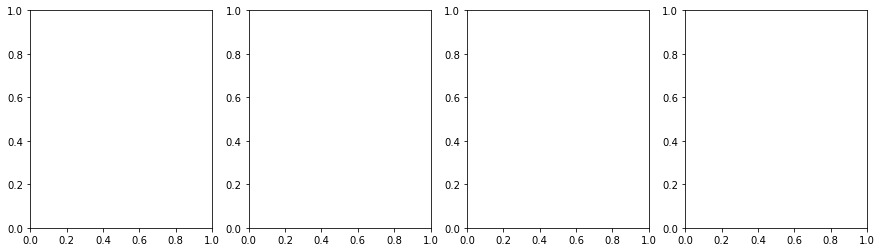

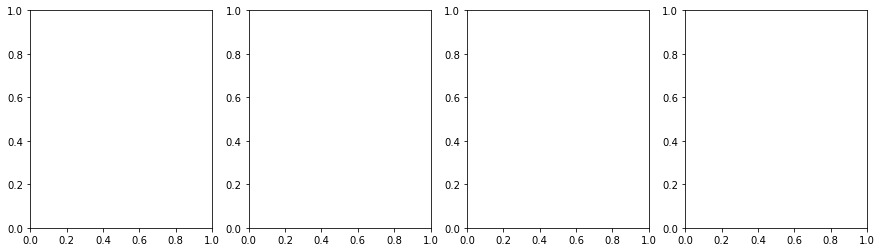

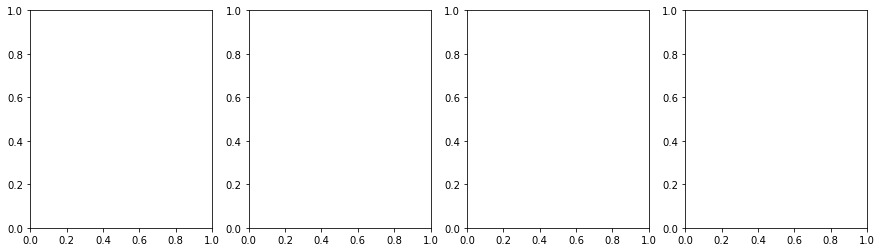

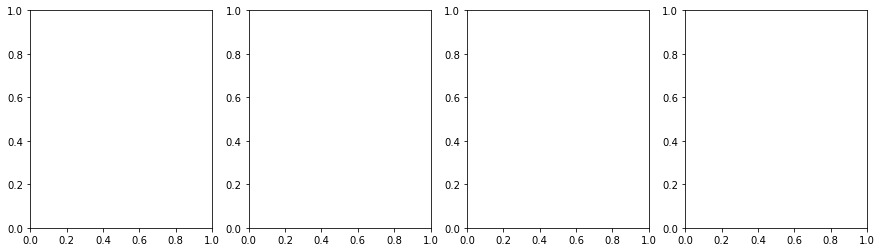

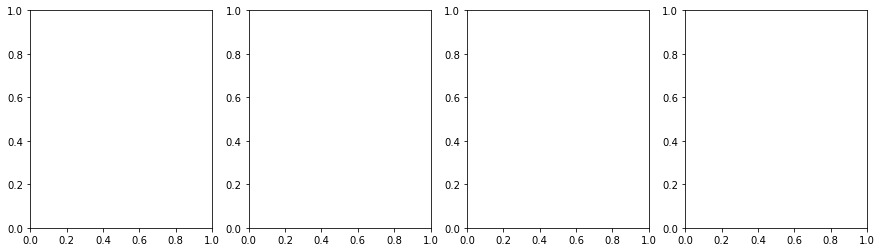

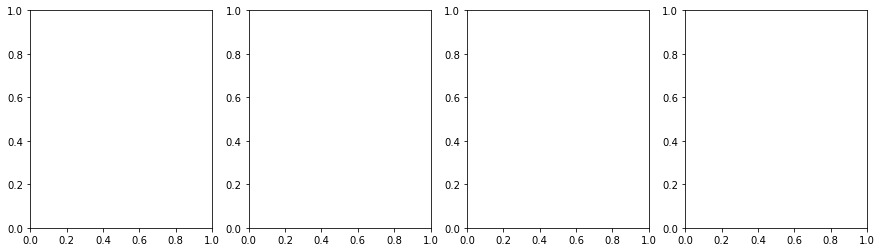

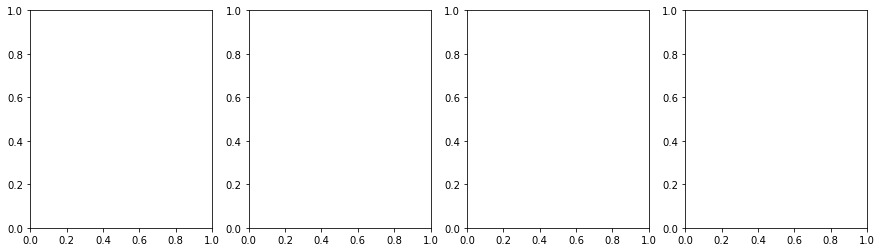

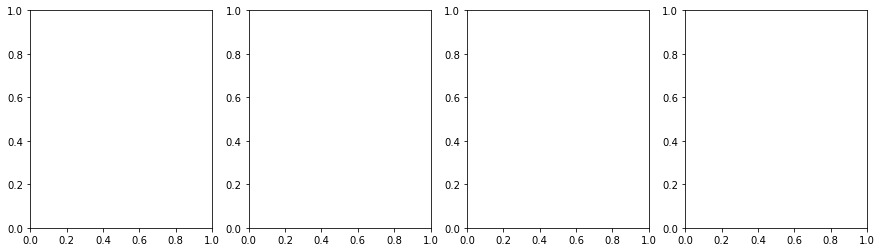

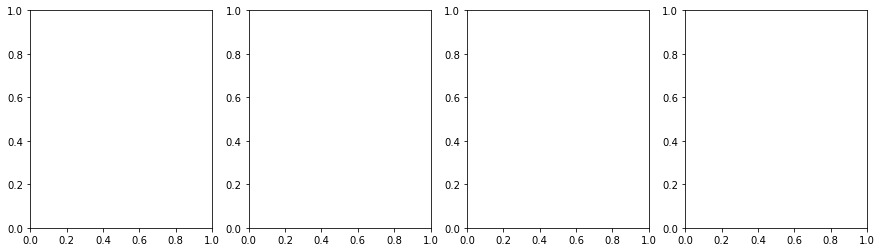

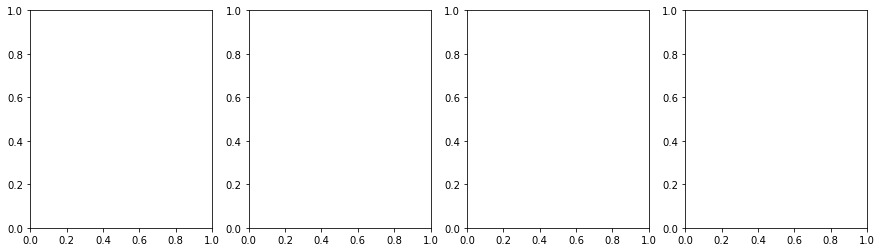

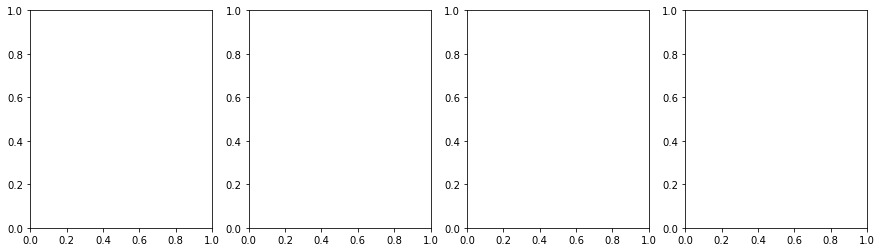

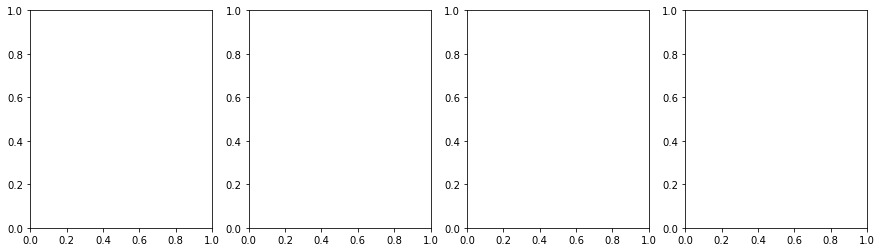

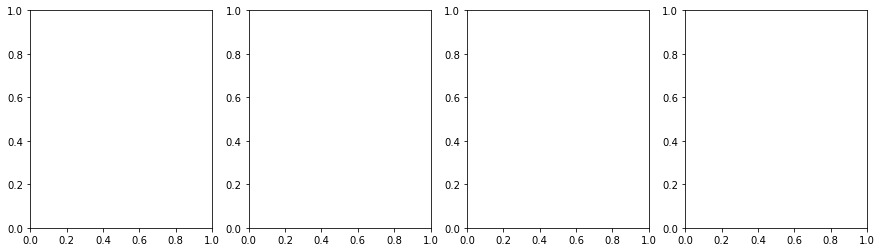

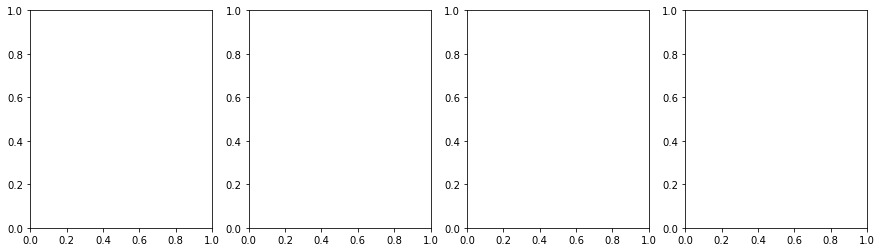

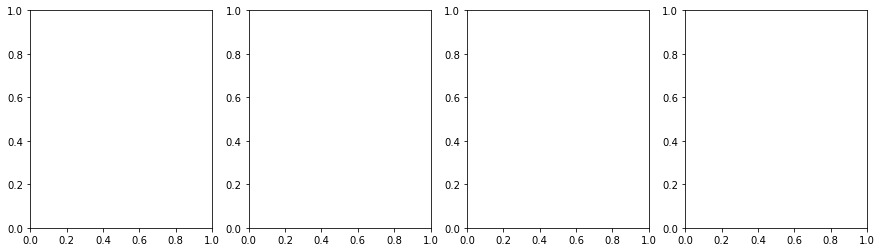

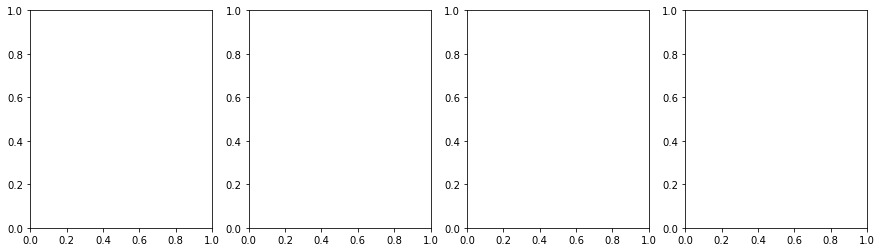

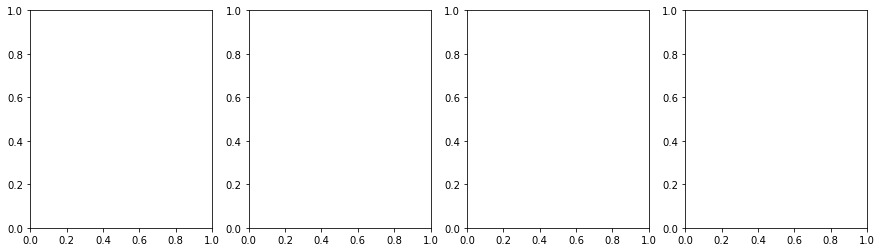

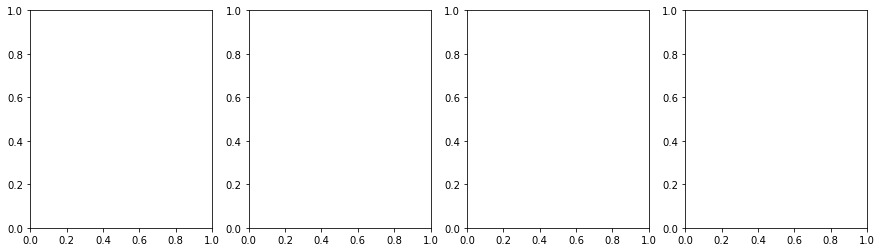

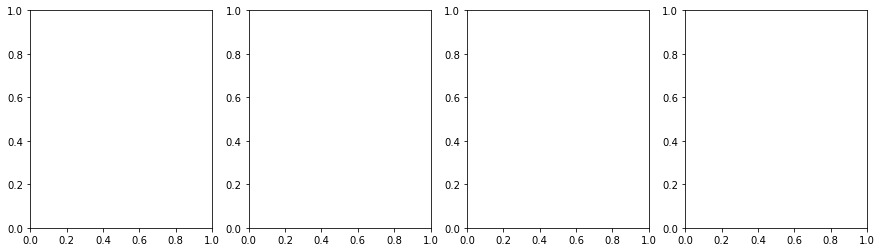

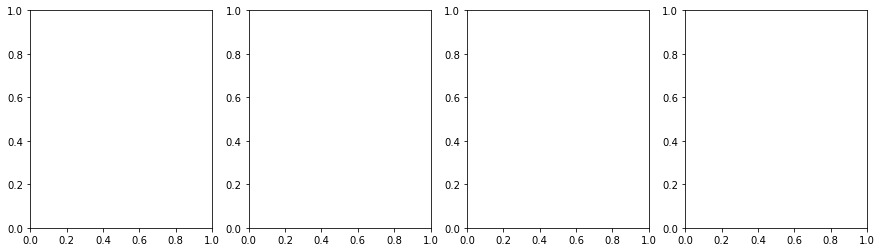

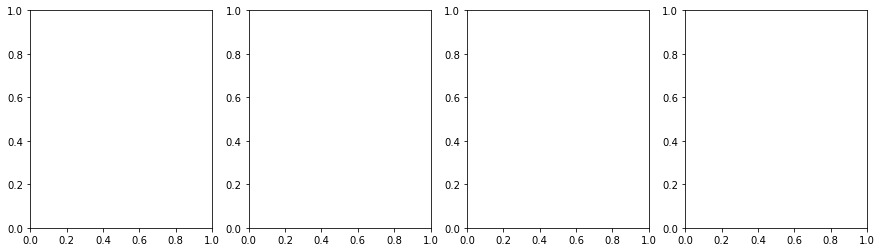

In [4]:
name, value, folder, catalog = [], [], [], []
FOLDERS = os.listdir(r'D:\Konrad\TCM_3D\keyence_rr')
for FOLDER in FOLDERS: 
    PATH = r'D:\Konrad\TCM_3D\keyence_rr' + '//' + FOLDER
    SUBFOLDERS = os.listdir(PATH)
    for FILE in SUBFOLDERS:
        img = cv.imread(PATH + '\\' + FILE)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        r,g,b = cv.split(img)
        z1 = fz1(1060, 1200, False)
        print(FOLDER.split('_')[6],FILE.split('_')[1].split('S')[1],z1,FOLDER)
        name.append(FILE.split('_')[1].split('S')[1])
        value.append(z1)
        folder.append(FOLDER.split('_')[6])
        catalog.append(FOLDER)
    data = {'operator':folder, 'name':name, 'value':value, 'folder':catalog}
    CSV_NAME = 'Z-MSA.csv'
    df = pd.DataFrame(data, columns= ['operator','name','value','folder'])  
    df.to_csv (r'D:\Konrad\TCM_3D\keyence_rr' + '\\' + CSV_NAME, sep = ',', index = False, header=True)

    


# Gauge block MSA 3D scan

In [ ]:
PATH = r'D:\Konrad\TCM_3D\20211102_125918_plytka_wzorcowa_skok_2mm_png'
f = os.listdir(PATH)
print(f)

In [ ]:
def fp1(A,B,C,D):
    sx,sy = r.shape
    sum1 = np.zeros(shape=[sx, sy, 1])
    sum2= np.zeros(shape=[sx, sy, 1])

    X1s,X2s,Y1s,Y2s,Z1s,Z2s = 0 ,0 ,0 ,0, 0, 0
    n1, n2 = 0,0
    for x in range(sx):
        for y in range(sy):

            if( r[x,y]==255 or (b[x,y])==0 and g[x,y]==0):
                sum1[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])
                sum2[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])
            else:
                sum1[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]
                sum2[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]
               
            if(sum1[x,y]<A or sum1[x,y]>B):sum1[x,y] = 0

            if(sum2[x,y]<C or sum2[x,y]>D):sum2[x,y] = 0

    kernel = np.ones((13, 13), np.uint8)
    sum1 = cv.erode(sum1, kernel)     
    kernel = np.ones((13, 13), np.uint8)
    sum2 = cv.erode(sum2, kernel)  

    for x in range(sx):
        for y in range(sy):
            if(sum1[x,y] != 0):
                Z1s+= sum1[x,y]
                X1s+=x
                Y1s+=y
                n1+=1
            if(sum2[x,y] != 0):
                Z2s+= sum2[x,y]  
                X2s+=x
                Y2s+=y
                n2+=1

    X1s /= n1
    X2s /= n2
    Y1s /= n1
    Y2s /= n2
    Z1s /= n1
    Z2s /= n2

    his1 = sum1[sum1 != 0]  
    his2 = sum2[sum2 != 0]        
    mean = np.mean(his1)
    mean2 = np.mean(his2)

    '''TCM_scan
    print("Means x",X1s,X2s)
    print("Means y",Y1s,Y2s)
    print("Means z",Z1s,Z2s)
    
    figure(figsize=(5, 5), dpi=80)
    plt.imshow(sum1)
    plt.show()
    figure(figsize=(5, 5), dpi=80)
    plt.imshow(sum2)
    plt.show()
    '''
     
    A1, B1, A2, B2 = [], [], [], []
    points = []
    for x in range(sx):
        for y in range(sy):
                if(sum1[x,y]>A and sum1[x,y]<B):
                    sum1[x,y] = sum1[x,y] - mean
                    A1.append([x,y,1])
                    B1.append(sum1[x,y])
                    sum1[x,y] *= 100
                if(sum2[x,y]>C and sum2[x,y]<D):
                    sum2[x,y] = sum2[x,y] - mean2
                    A2.append([x,y,1])
                    B2.append(sum2[x,y])
                    sum2[x,y] *= 100
                
    N1 = ((np.linalg.lstsq(A1,B1,rcond=None))[0])
    N2 = ((np.linalg.lstsq(A2,B2,rcond=None))[0])
    N1[2]=-1
    N2[2]=-1
    N1 = N1/np.linalg.norm(N1)
    N2 = N2/np.linalg.norm(N2)
    N = N1 + N2
    N = N/np.linalg.norm(N)
    h = abs ( N[0]*(X1s - X2s) + N[1]*(Y1s-Y2s) + N[2]*(Z1s-Z2s) )
    
    print('N1', (np.linalg.lstsq(A1,B1,rcond=None))[0])
    print('N2', (np.linalg.lstsq(A2,B2,rcond=None))[0])
    print('N', N)
    
    figure(figsize=(5, 5), dpi=80)
    plt.imshow(sum1)
    plt.show()
    figure(figsize=(5, 5), dpi=80)
    plt.imshow(sum2)
    plt.show()
    

    print(h*0.005)
    return f


for DATA in f:
    img = cv.imread(PATH + '\\' + DATA)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    r,g,b = cv.split(img)
    dif=fp1(740,830,1140,1220)

